<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# MiniProject2
# Vehicle Insurance Claim Fraud Detection

Vehicle insurance fraud poses a significant financial risk to insurers, leading to increased claim costs, delayed processing, and higher premiums. Common schemes include staged accidents, phantom passengers, and inflated injury claims—all designed to extract undue payouts.

These fraudulent activities erode profitability, strain operational resources, and damage customer trust.

This project leverages data science to address the problem proactively. By analyzing patterns in historical claims data, the goal is to develop a fraud detection model that flags high-risk claims for further investigation. Early detection will reduce financial losses, streamline claims processing, and improve overall risk management.

# Data Dictionary #
- **Month**: The month in which the insurance claim was made.
- **WeekOfMonth**: The week of the month in which the insurance claim was made.
- **DayOfWeek**: The day of the week on which the insurance claim was made.
- **Make**: The manufacturer of the vehicle involved in the claim.
- **AccidentArea**: The area where the accident occurred (e.g., urban, rural).
- **DayOfWeekClaimed**: The day of the week on which the insurance claim was processed.
- **MonthClaimed**: The month in which the insurance claim was processed.
- **WeekOfMonthClaimed**: The week of the month in which the insurance claim was processed.
- **Sex**: The gender of the policyholder.
- **MaritalStatus**: The material status of the policyholder.
- **Age**: The age of the policyholder.
- **Fault**: Indicates whether the policyholder was at fault in the accident.
- **PolicyType**: The type of insurance policy (e.g., comprehensive, third-party).
- **VehicleCategory**: The category of the vehicle (e.g., sedan, SUV).
- **VehiclePrice**: The price of vehicle.
- **FraudFound_P**: Indicates whether fraud was detected in the insurance claim.
- **PolicyNumber**: The unique identifier for the insurance policy.
- **RepNumber**: The unique identifier for the insurance representative handling the claim.
- **Deductible**: The amount that the policy holder must pay out of pocket before the insurance company pays the remaining costs.
- **DriverRating**: The rating of the driver, often based on driving history or other factors.
- **Days_Policy_Accident**: The number of days since the policy was issued until the accident occurred.
- **Days_Policy_Claim**: The number of days since the policy was issued until the claim was made.
- **PastNumberOfClaims**: The number of claims previously made by the policyholder.
- **AgeOfVehicle**: The age of the vehicle involved in the claim.
- **AgeOfPolicyHolder**: The age of the policyholder.
- **PoliceReportFiled**: Indicates whether a police report was filed for the accident.
- **WitnessPresent**: Indicates whether a witness was present at the scene of the accident.
- **AgentType**: The type of insurance agent handling the policy (e.g., internal, external)
- **NumberOfSuppliments**: The number of supplementary documents or claims related to the main claim, categorized into ranges.
- **AddressChange_Claim**: Indicates whether the address of the policyholder was changed at the time of the claim, categorized into ranges.
- **NumberOfCars**: The number of cars insured under the policy, categorized into ranges.
- **Year**: The year in which the claim was made or processed.
- **BasePolicy**: The base policy type (e.g., Liability, Collision, All Perils).

### 1. Load Data

The dataset includes detailed information on vehicles (such as attributes, model, and accident history) along with insurance policy details (including policy type, tenure, and coverage). The objective is to identify whether a given claim is fraudulent, as indicated by the target variable FraudFound_P.

In [211]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

from ipywidgets import *
from IPython.display import display

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

# Encoding
from sklearn.preprocessing import LabelEncoder

#RandomForest
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [89]:
fraud_csv = 'C:/Yan/Labs/MiniProject2/fraud.csv'
fraud = pd.read_csv(fraud_csv)

### 2. EDA

- Explore dataset. Clean data (if required)
- Find features to predict class

In [91]:
fraud.head().T

,0,1,2,3,4
Month,Dec,Jan,Oct,Jun,Jan
WeekOfMonth,5,3,5,2,5
DayOfWeek,Wednesday,Wednesday,Friday,Saturday,Monday
Make,Honda,Honda,Honda,Toyota,Honda
AccidentArea,Urban,Urban,Urban,Rural,Urban
DayOfWeekClaimed,Tuesday,Monday,Thursday,Friday,Tuesday
MonthClaimed,Jan,Jan,Nov,Jul,Feb
WeekOfMonthClaimed,1,4,2,1,2
Sex,Female,Male,Male,Male,Female
MaritalStatus,Single,Single,Married,Married,Single


In [7]:
fraud.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [9]:
fraud.duplicated().sum()

0

In [93]:
# Function01: Summarize the characteristic of dataset
def summarize(DataFrame):
    
    summary = pd.DataFrame()
    
    # Data Type
    summary['Data Type'] = DataFrame.dtypes
    # N Unique
    summary['N Unique'] = DataFrame.nunique()
    # Unique
    summary['Unique'] = DataFrame.apply(lambda x: x.unique().tolist())
    # Max
    summary['Max'] = DataFrame.apply(lambda x: x.max() if pd.api.types.is_numeric_dtype(x) else '-')
    # Min
    summary['Min'] = DataFrame.apply(lambda x: x.min() if pd.api.types.is_numeric_dtype(x) else '-')
    
    # Measures of Central Tendency: Mean, Median, Mode 
    summary['Mean'] = DataFrame.apply(lambda x: round(x.mean(), 2) if pd.api.types.is_numeric_dtype(x) else '-')
    summary['Median'] = DataFrame.apply(lambda x: x.median() if pd.api.types.is_numeric_dtype(x) else '-')
    summary['Mode'] = DataFrame.apply(lambda x: x.mode().iloc[0] if not x.mode().empty else '-')
    
    # Measures of Dispersion: Range, Variance, Standard Deviation
    summary['Range'] = DataFrame.apply(lambda x: x.max() - x.min() if pd.api.types.is_numeric_dtype(x) else '-')
    summary['Variance'] = DataFrame.apply(lambda x: x.var() if pd.api.types.is_numeric_dtype(x) else '-')
    summary['Standard Deviation'] = DataFrame.apply(lambda x: x.std() if pd.api.types.is_numeric_dtype(x) else '-')
    
    # Measures of Shape: Skewness, Kurtosis
    summary['Skewness'] = DataFrame.apply(lambda x: round(x.skew(), 2) if pd.api.types.is_numeric_dtype(x) else '-')
    summary['Kurtosis'] = DataFrame.apply(lambda x: round(x.kurt(), 2) if pd.api.types.is_numeric_dtype(x) else '-')
    
    return summary

In [95]:
summary = summarize(fraud)
summary

,Data Type,N Unique,Unique,Max,Min,Mean,Median,Mode,Range,Variance,Standard Deviation,Skewness,Kurtosis
Month,object,12,"[Dec, Jan, Oct, Jun, Feb, Nov, Apr, Mar, Aug, ...",-,-,-,-,Jan,-,-,-,-,-
WeekOfMonth,int64,5,"[5, 3, 2, 4, 1]",5,1,2.79,3.0,3,4,1.657876,1.287585,0.12,-1.1
DayOfWeek,object,7,"[Wednesday, Friday, Saturday, Monday, Tuesday,...",-,-,-,-,Monday,-,-,-,-,-
Make,object,19,"[Honda, Toyota, Ford, Mazda, Chevrolet, Pontia...",-,-,-,-,Pontiac,-,-,-,-,-
AccidentArea,object,2,"[Urban, Rural]",-,-,-,-,Urban,-,-,-,-,-
DayOfWeekClaimed,object,8,"[Tuesday, Monday, Thursday, Friday, Wednesday,...",-,-,-,-,Monday,-,-,-,-,-
MonthClaimed,object,13,"[Jan, Nov, Jul, Feb, Mar, Dec, Apr, Aug, May, ...",-,-,-,-,Jan,-,-,-,-,-
WeekOfMonthClaimed,int64,5,"[1, 4, 2, 3, 5]",5,1,2.69,3.0,2,4,1.585371,1.259115,0.16,-1.09
Sex,object,2,"[Female, Male]",-,-,-,-,Male,-,-,-,-,-
MaritalStatus,object,4,"[Single, Married, Widow, Divorced]",-,-,-,-,Married,-,-,-,-,-


01: There is no missing value.

02: "PolicyNumber" is merely an identification number. Let's drop it.

03: The features "Sex", "PoliceReportFiled", and "WitnessPresent" are actually Boolen Types. Should be converted to 0 or 1.

04: The features "AccidentalArea", "Fault", and "AgentType" each have only two unique values. Can also be converted to 0 or 1.

05: The minimum value of "Age" is 0. It totally doesn't make sense.

06: The features "FraudFound_P" and "Deductible" are highly skewed; Typically, a feature is considered skewed if its skewness falls outside the range of -0.5~0.5.

07: The features "WeekOfMonth", "WeekOfMonthClaimed", "FraudFound_P", "Deductible", and "DriverRating" exhibit high kurtosis; Typically a feature is considered to have high kurtosis if its value falls outside the range of -1 ~ 1.

08: Strictly speaking, among all the features, only Age is a numeric variable. The rest can be interpreted as categorical variables

In [97]:
fraud.shape

(15420, 33)

In [17]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [99]:
fraud_counts = fraud['FraudFound_P'].value_counts(normalize=True)
fraud_counts

FraudFound_P
0    0.940143
1    0.059857
Name: proportion, dtype: float64

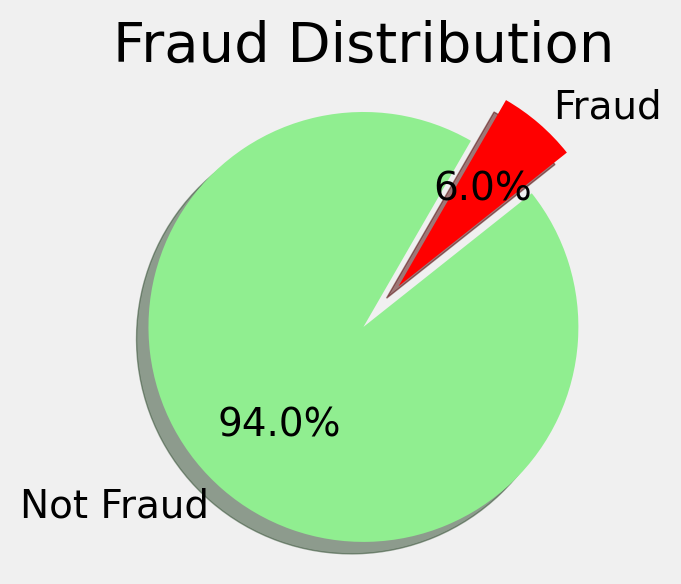

In [101]:
labels = ['Not Fraud' if i == 0 else 'Fraud' for i in fraud_counts.index]
plt.figure(figsize=(3, 3))
explode = (0, 0.25)
plt.pie(fraud_counts.values, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=60, colors=['lightgreen', 'red'])
plt.title('Fraud Distribution')
plt.axis('equal')  # Ensures pie is circular
plt.show()

The Target Variable "Fraud_Found_P" is **highly imbalanced**.

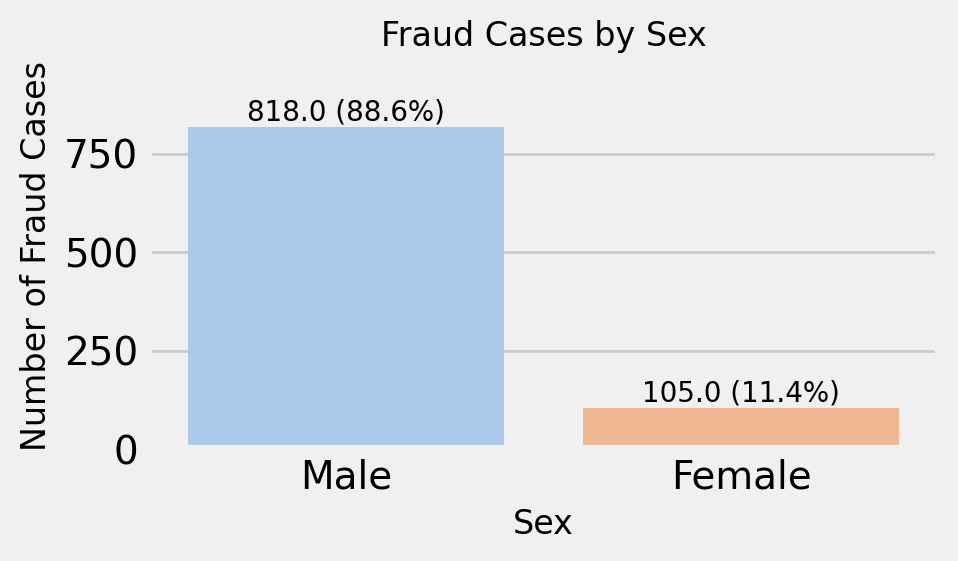

In [103]:
# Fraud Dection by Sex

# Step 1: Filter fraud cases
fraud_1 = fraud[fraud['FraudFound_P'] == 1]

# Step 2: Create countplot
plt.figure(figsize=(5, 3))
ax = sns.countplot(data=fraud_1, x='Sex', palette='pastel')

# Step 3: Add count + percent labels on bars
total = len(fraud_1)
for bar in ax.patches:
    count = bar.get_height()
    percent = 100 * count / total
    label = f'{count} ({percent:.1f}%)'
    ax.text(bar.get_x() + bar.get_width()/2,
            count + 1, label,
            ha='center', va='bottom', fontsize=10)

# Step 4: Customize appearance
plt.title('Fraud Cases by Sex', fontsize=12)
plt.ylabel('Number of Fraud Cases', fontsize=12)
plt.xlabel('Sex', fontsize=12)
plt.ylim(0, max(p.get_height() for p in ax.patches) * 1.2)
plt.tight_layout()
plt.show()


The data shows that men are involved in more fraud cases than women.

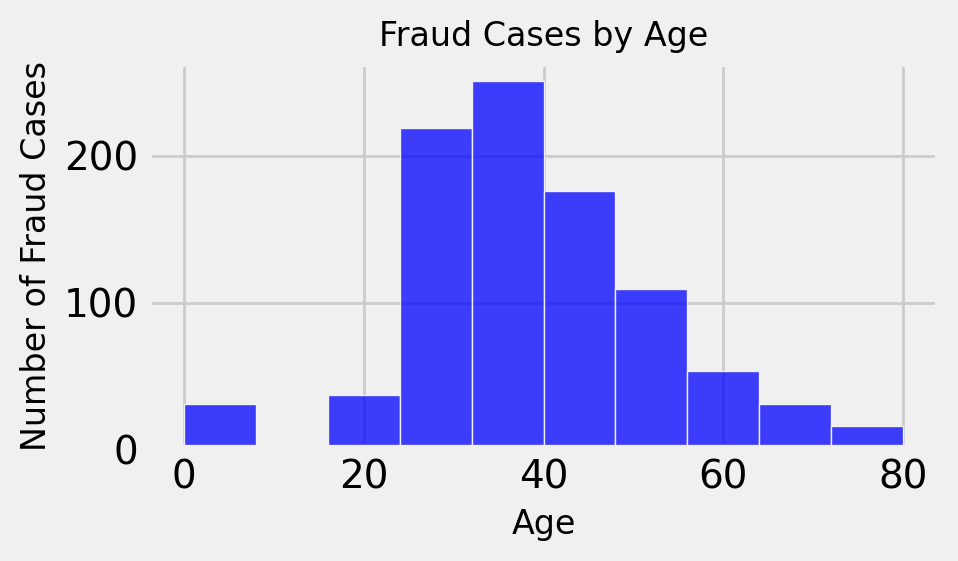

In [25]:
# Fraud Detection by Age
fraud_1 = fraud[fraud['FraudFound_P'] == 1]

# Plot histogram of Age
plt.figure(figsize=(5, 3))
sns.histplot(data=fraud_1, x='Age', bins=10, kde=False, color='blue')

plt.title('Fraud Cases by Age', fontsize=12)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Fraud Cases', fontsize=12)
plt.tight_layout()
plt.show()

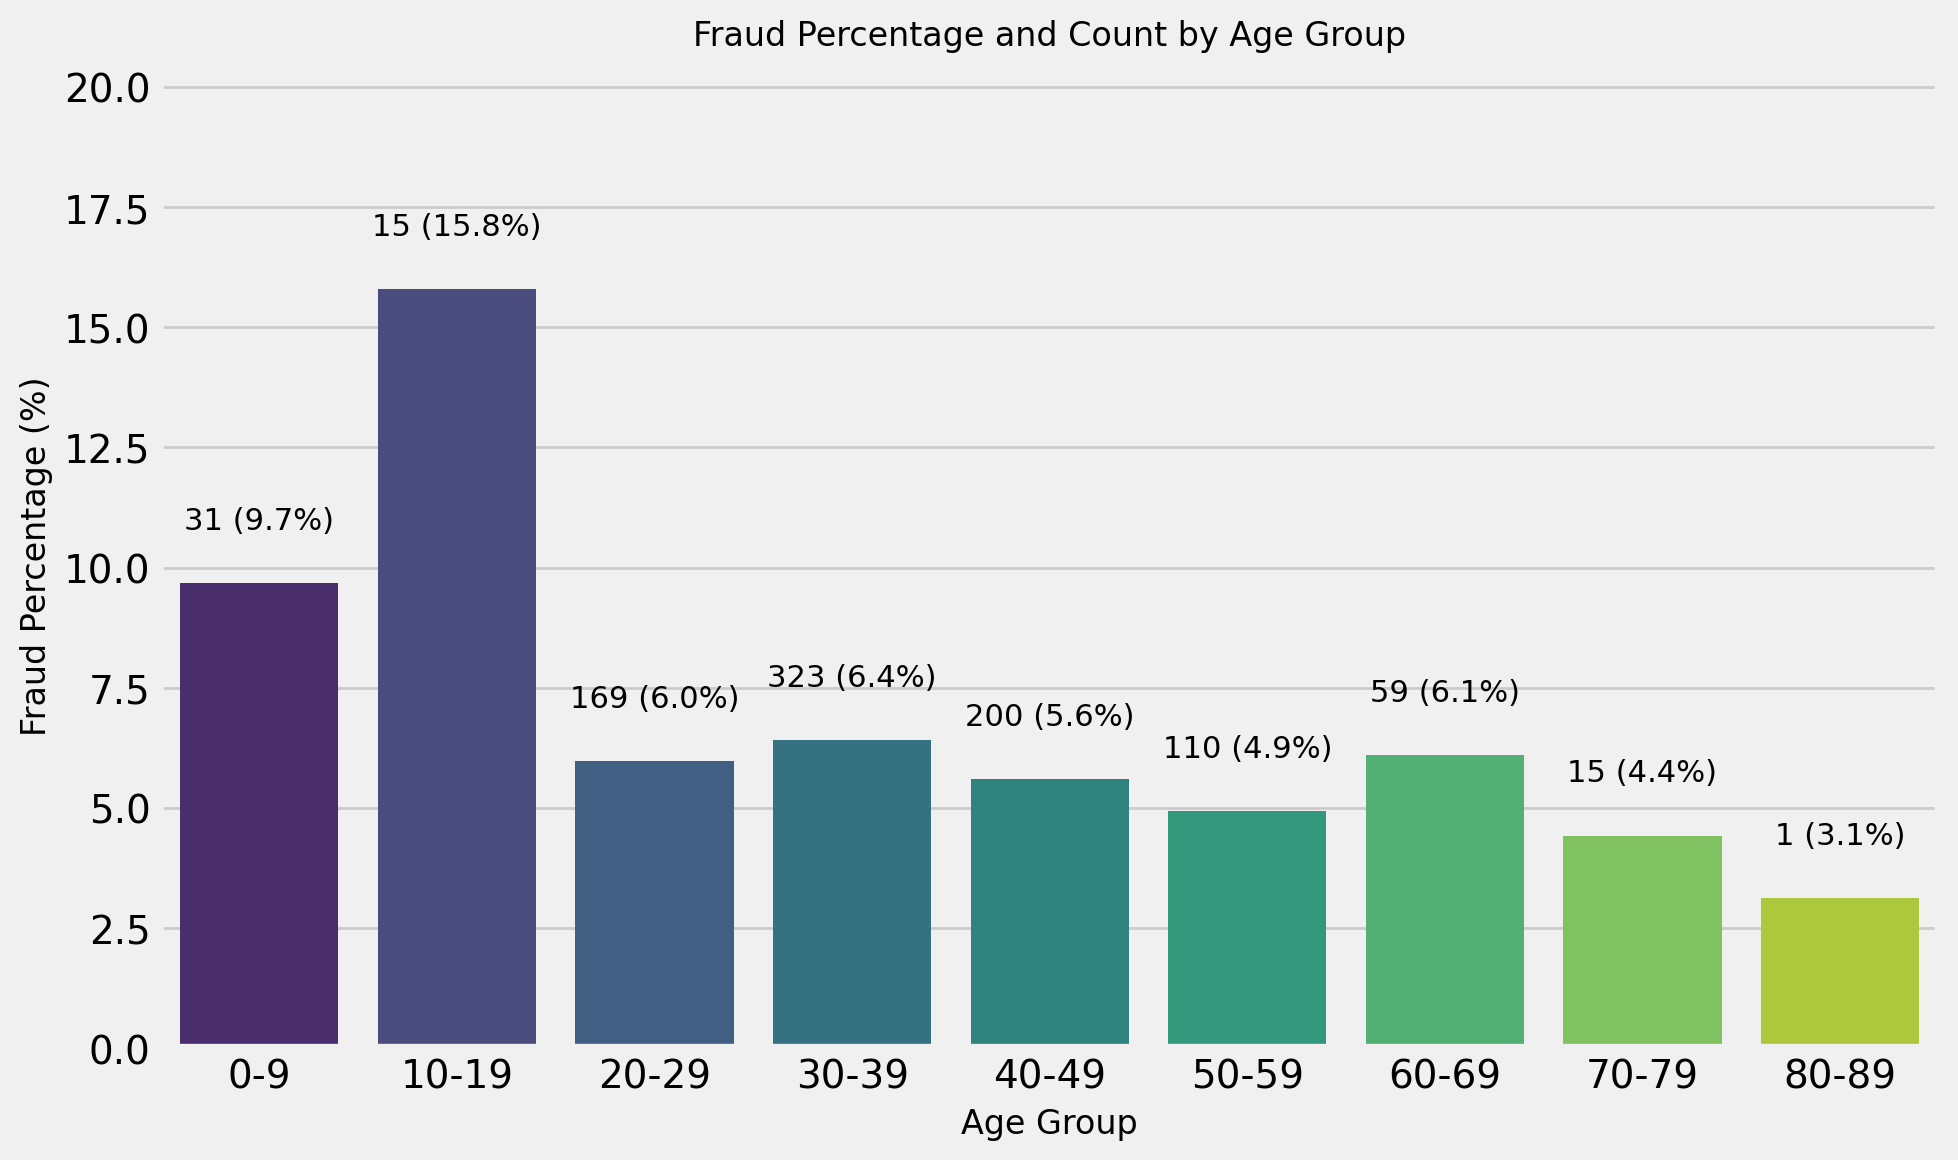

In [27]:
# Step 1: Create age groups
bins = range(0, 100, 10)
labels = [f'{i}-{i+9}' for i in bins[:-1]]
fraud['AgeGroup'] = pd.cut(fraud['Age'], bins=bins, labels=labels, right=False)

# Step 2: Group and calculate fraud % and count
grouped = fraud.groupby('AgeGroup')['FraudFound_P']
fraud_count = grouped.sum()
total_count = grouped.count()
fraud_pct = (fraud_count / total_count) * 100

# Step 3: Create dataframe
age_df = pd.DataFrame({
    'AgeGroup': fraud_count.index.astype(str),
    'FraudCount': fraud_count.values,
    'TotalCount': total_count.values,
    'FraudPercentage': fraud_pct.values
})

# Step 4: Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=age_df, x='AgeGroup', y='FraudPercentage', palette='viridis')

# Step 5: Add labels (e.g., "12 (6.3%)")
for bar, count, pct in zip(ax.patches, age_df['FraudCount'], age_df['FraudPercentage']):
    height = bar.get_height()
    label = f'{int(count)} ({pct:.1f}%)'
    ax.text(bar.get_x() + bar.get_width()/2, height + 1,
            label, ha='center', va='bottom', fontsize=11)

# Step 6: Final touches
plt.title('Fraud Percentage and Count by Age Group', fontsize=12)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Fraud Percentage (%)', fontsize=12)
plt.ylim(0, age_df['FraudPercentage'].max() * 1.3)
plt.tight_layout()
plt.show()


Fraud is most frequently detected among teenagers. Teenagers have weak financial power as they have not yet started their economic activities.

In [29]:
#fraud['AgeGroup'][fraud['FraudFound_P'] == 1].value_counts()


AgeGroup
30-39    323
40-49    200
20-29    169
50-59    110
60-69     59
0-9       31
10-19     15
70-79     15
80-89      1
Name: count, dtype: int64

In [31]:
#fraud['AgeGroup'].value_counts()

AgeGroup
30-39    5041
40-49    3568
20-29    2828
50-59    2230
60-69     967
70-79     339
0-9       320
10-19      95
80-89      32
Name: count, dtype: int64

In [105]:
 fraud['AgeOfPolicyHolder'].unique()

array(['26 to 30', '31 to 35', '41 to 50', '51 to 65', '21 to 25',
       '36 to 40', '16 to 17', 'over 65', '18 to 20'], dtype=object)

In [107]:
fraud['Make'].unique()

array(['Honda', 'Toyota', 'Ford', 'Mazda', 'Chevrolet', 'Pontiac',
       'Accura', 'Dodge', 'Mercury', 'Jaguar', 'Nisson', 'VW', 'Saab',
       'Saturn', 'Porche', 'BMW', 'Mecedes', 'Ferrari', 'Lexus'],
      dtype=object)

In [109]:
fraud[fraud['Age'] == 0]

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
7,Nov,1,Friday,Honda,Urban,Tuesday,Mar,4,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
13,Jan,5,Friday,Honda,Rural,Wednesday,Feb,1,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
28,Jul,1,Saturday,Honda,Urban,Tuesday,Sep,4,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils
31,Mar,1,Sunday,Honda,Urban,Tuesday,Mar,2,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
58,May,1,Monday,Honda,Rural,Wednesday,May,4,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Liability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15243,May,2,Tuesday,Honda,Urban,Monday,May,3,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1996,Liability
15262,Mar,3,Monday,Honda,Urban,Thursday,Mar,3,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1996,Liability
15274,Apr,3,Monday,Honda,Urban,Tuesday,May,1,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1996,Collision
15379,Jan,2,Tuesday,Honda,Urban,Thursday,Jan,2,Male,Single,...,new,16 to 17,No,No,External,none,1 year,1 vehicle,1996,All Perils


In [111]:
def plot_fraud_percentage_bar(data, group_col, target_col='FraudFound_P',
                              sort_by='percentage', title=None, figsize=(16, 8),
                              horizontal=False):
    """
    Plots fraud percentage and count for any categorical column.

    Parameters:
    - data: DataFrame
    - group_col: column to group by (e.g., 'Make')
    - target_col: binary column indicating fraud (default='FraudFound_P')
    - sort_by: 'percentage', 'count', or None
    - title: optional custom plot title
    - figsize: figure size
    - horizontal: if True, plot horizontal bars
    """

    # Group and calculate
    grouped = data.groupby(group_col)[target_col]
    fraud_count = grouped.sum()
    total_count = grouped.count()
    fraud_pct = (fraud_count / total_count) * 100

    # Create DataFrame
    df = pd.DataFrame({
        group_col: fraud_count.index,
        'FraudCount': fraud_count.values,
        'TotalCount': total_count.values,
        'FraudPercentage': fraud_pct.values
    })

    # Sort if requested
    if sort_by == 'percentage':
        df = df.sort_values('FraudPercentage', ascending=False)
    elif sort_by == 'count':
        df = df.sort_values('FraudCount', ascending=False)
    # else: keep original order

    # Plot
    plt.figure(figsize=figsize)
    
    if horizontal:
        ax = sns.barplot(data=df, y=group_col, x='FraudPercentage', palette='viridis')
        for bar, count, pct in zip(ax.patches, df['FraudCount'], df['FraudPercentage']):
            width = bar.get_width()
            label = f'{int(count)} ({pct:.1f}%)'
            ax.text(width + 0.5, bar.get_y() + bar.get_height()/2,
                    label, va='center', fontsize=12)
        plt.xlabel('Fraud Percentage (%)')
        plt.ylabel(group_col)
    else:
        ax = sns.barplot(data=df, x=group_col, y='FraudPercentage', palette='viridis')
        for bar, count, pct in zip(ax.patches, df['FraudCount'], df['FraudPercentage']):
            height = bar.get_height()
            label = f'{int(count)} ({pct:.1f}%)'
            ax.text(bar.get_x() + bar.get_width()/2, height + 0.5,
                    label, ha='center', va='bottom', fontsize=8)
        plt.ylabel('Fraud Percentage (%)', fontsize=18)
        plt.xlabel(group_col, fontsize=18)
        plt.xticks(rotation=45, ha='right', fontsize=10)

    # Final touches
    plt.title(title or f'Fraud Count and Percentage by {group_col}', fontsize=20)
    plt.tight_layout()
    plt.show()


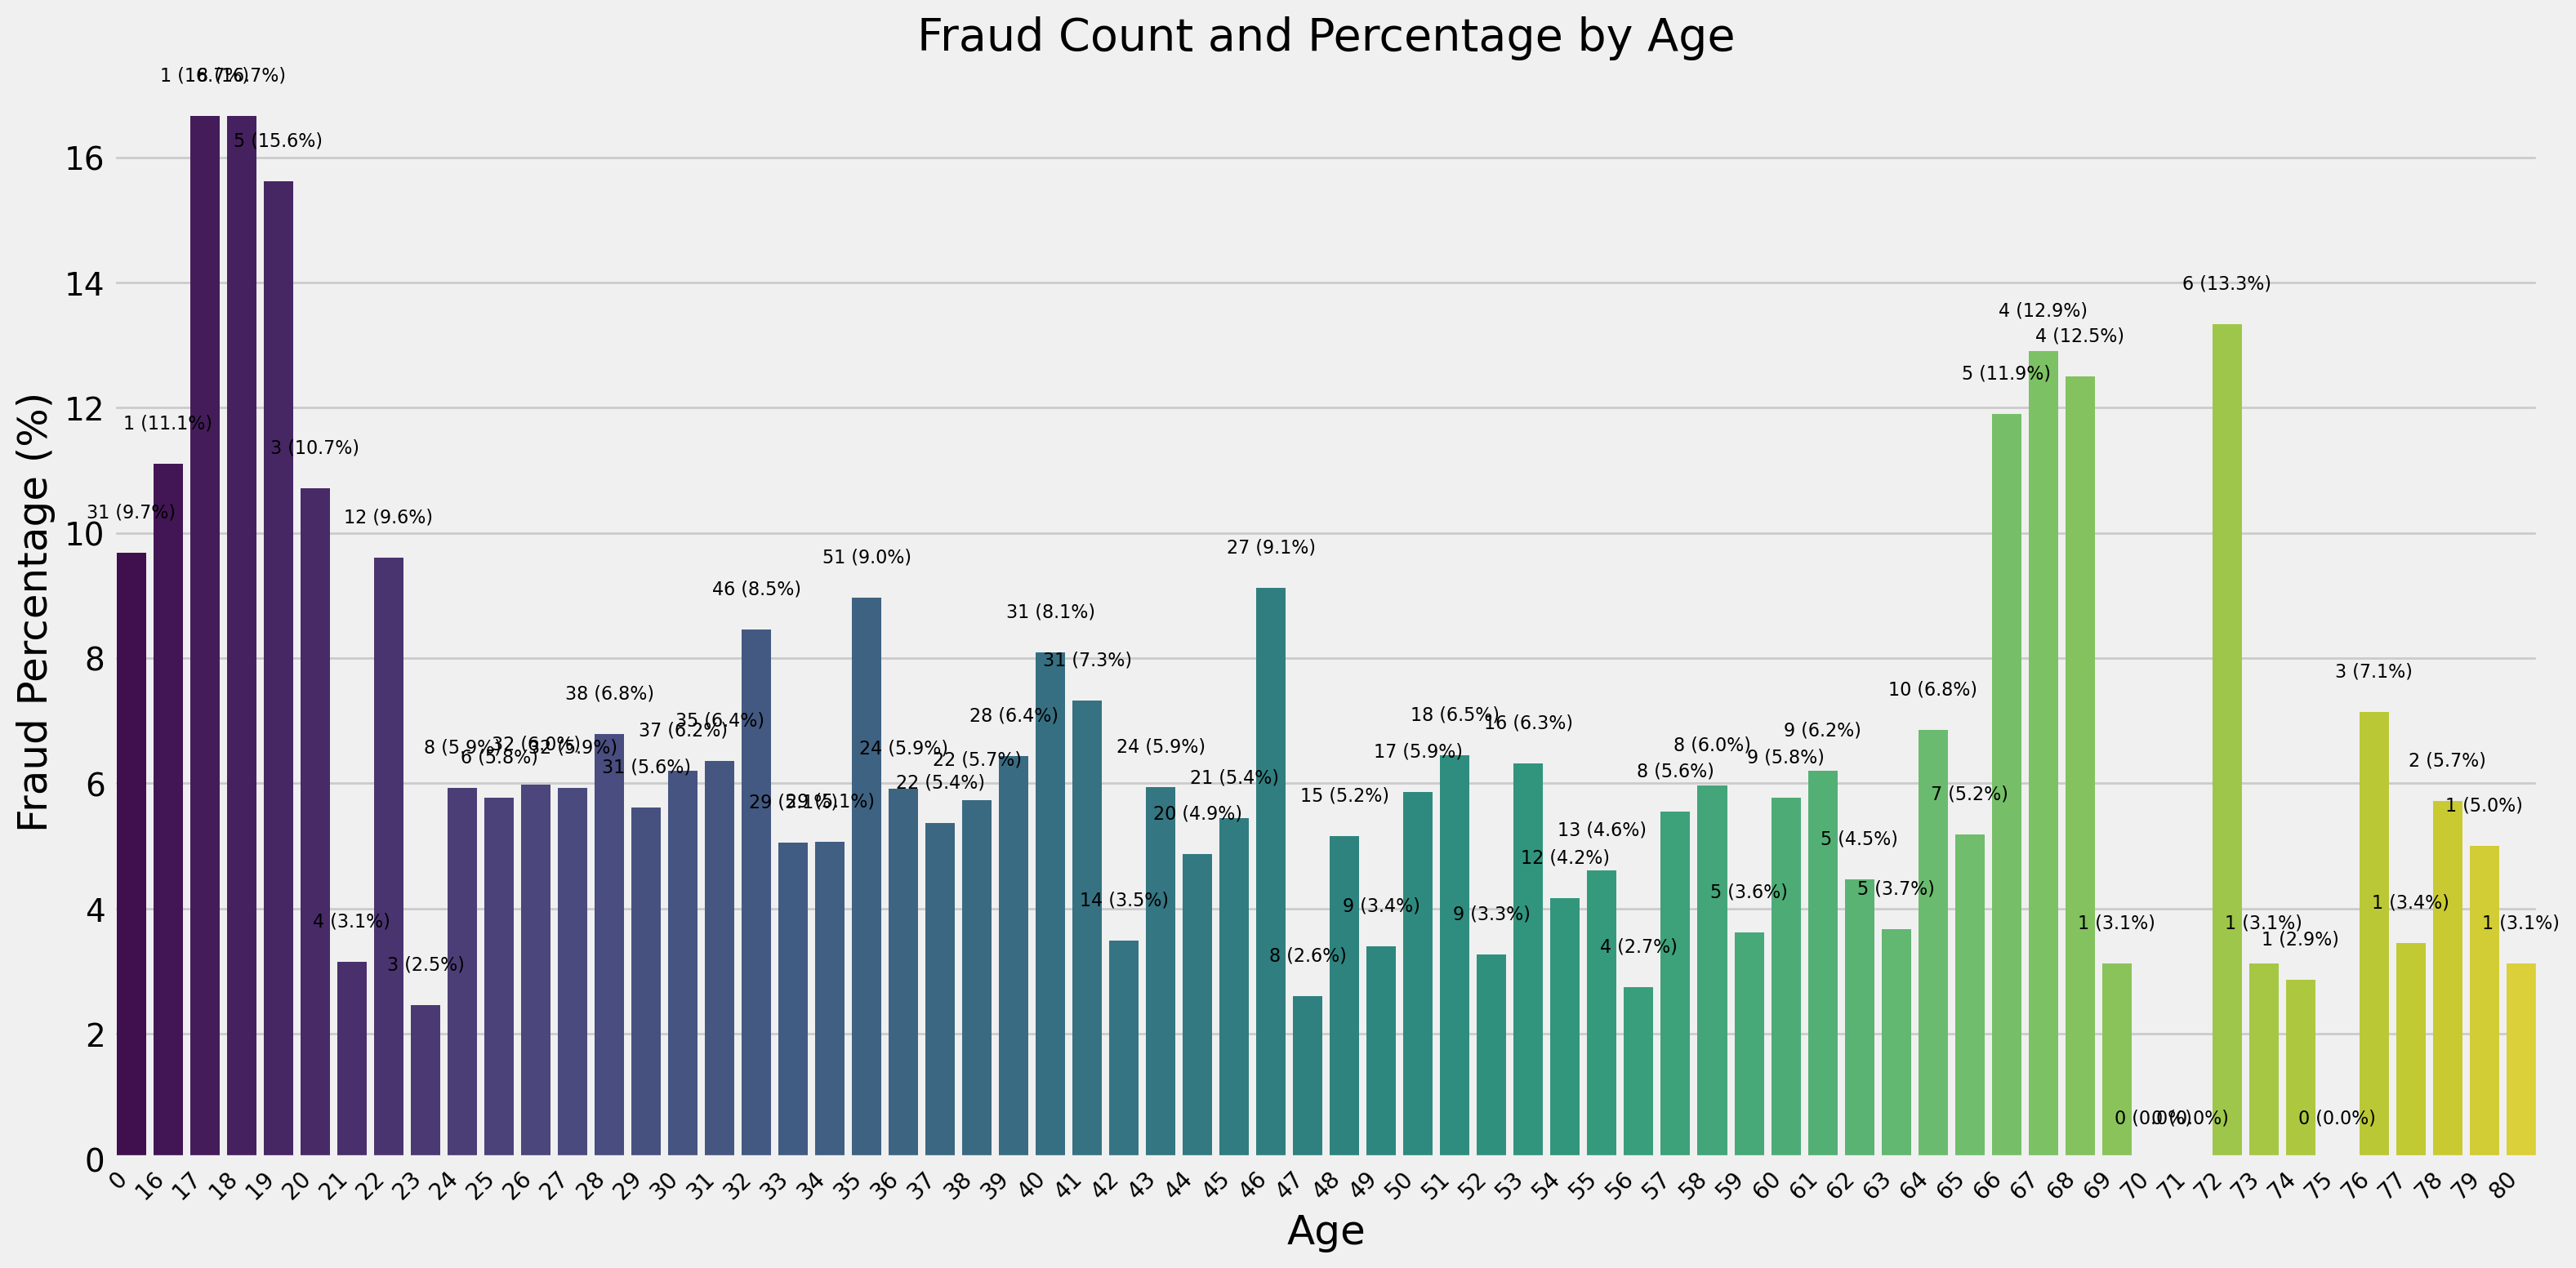

In [113]:
plot_fraud_percentage_bar(fraud, 'Age', sort_by=None)

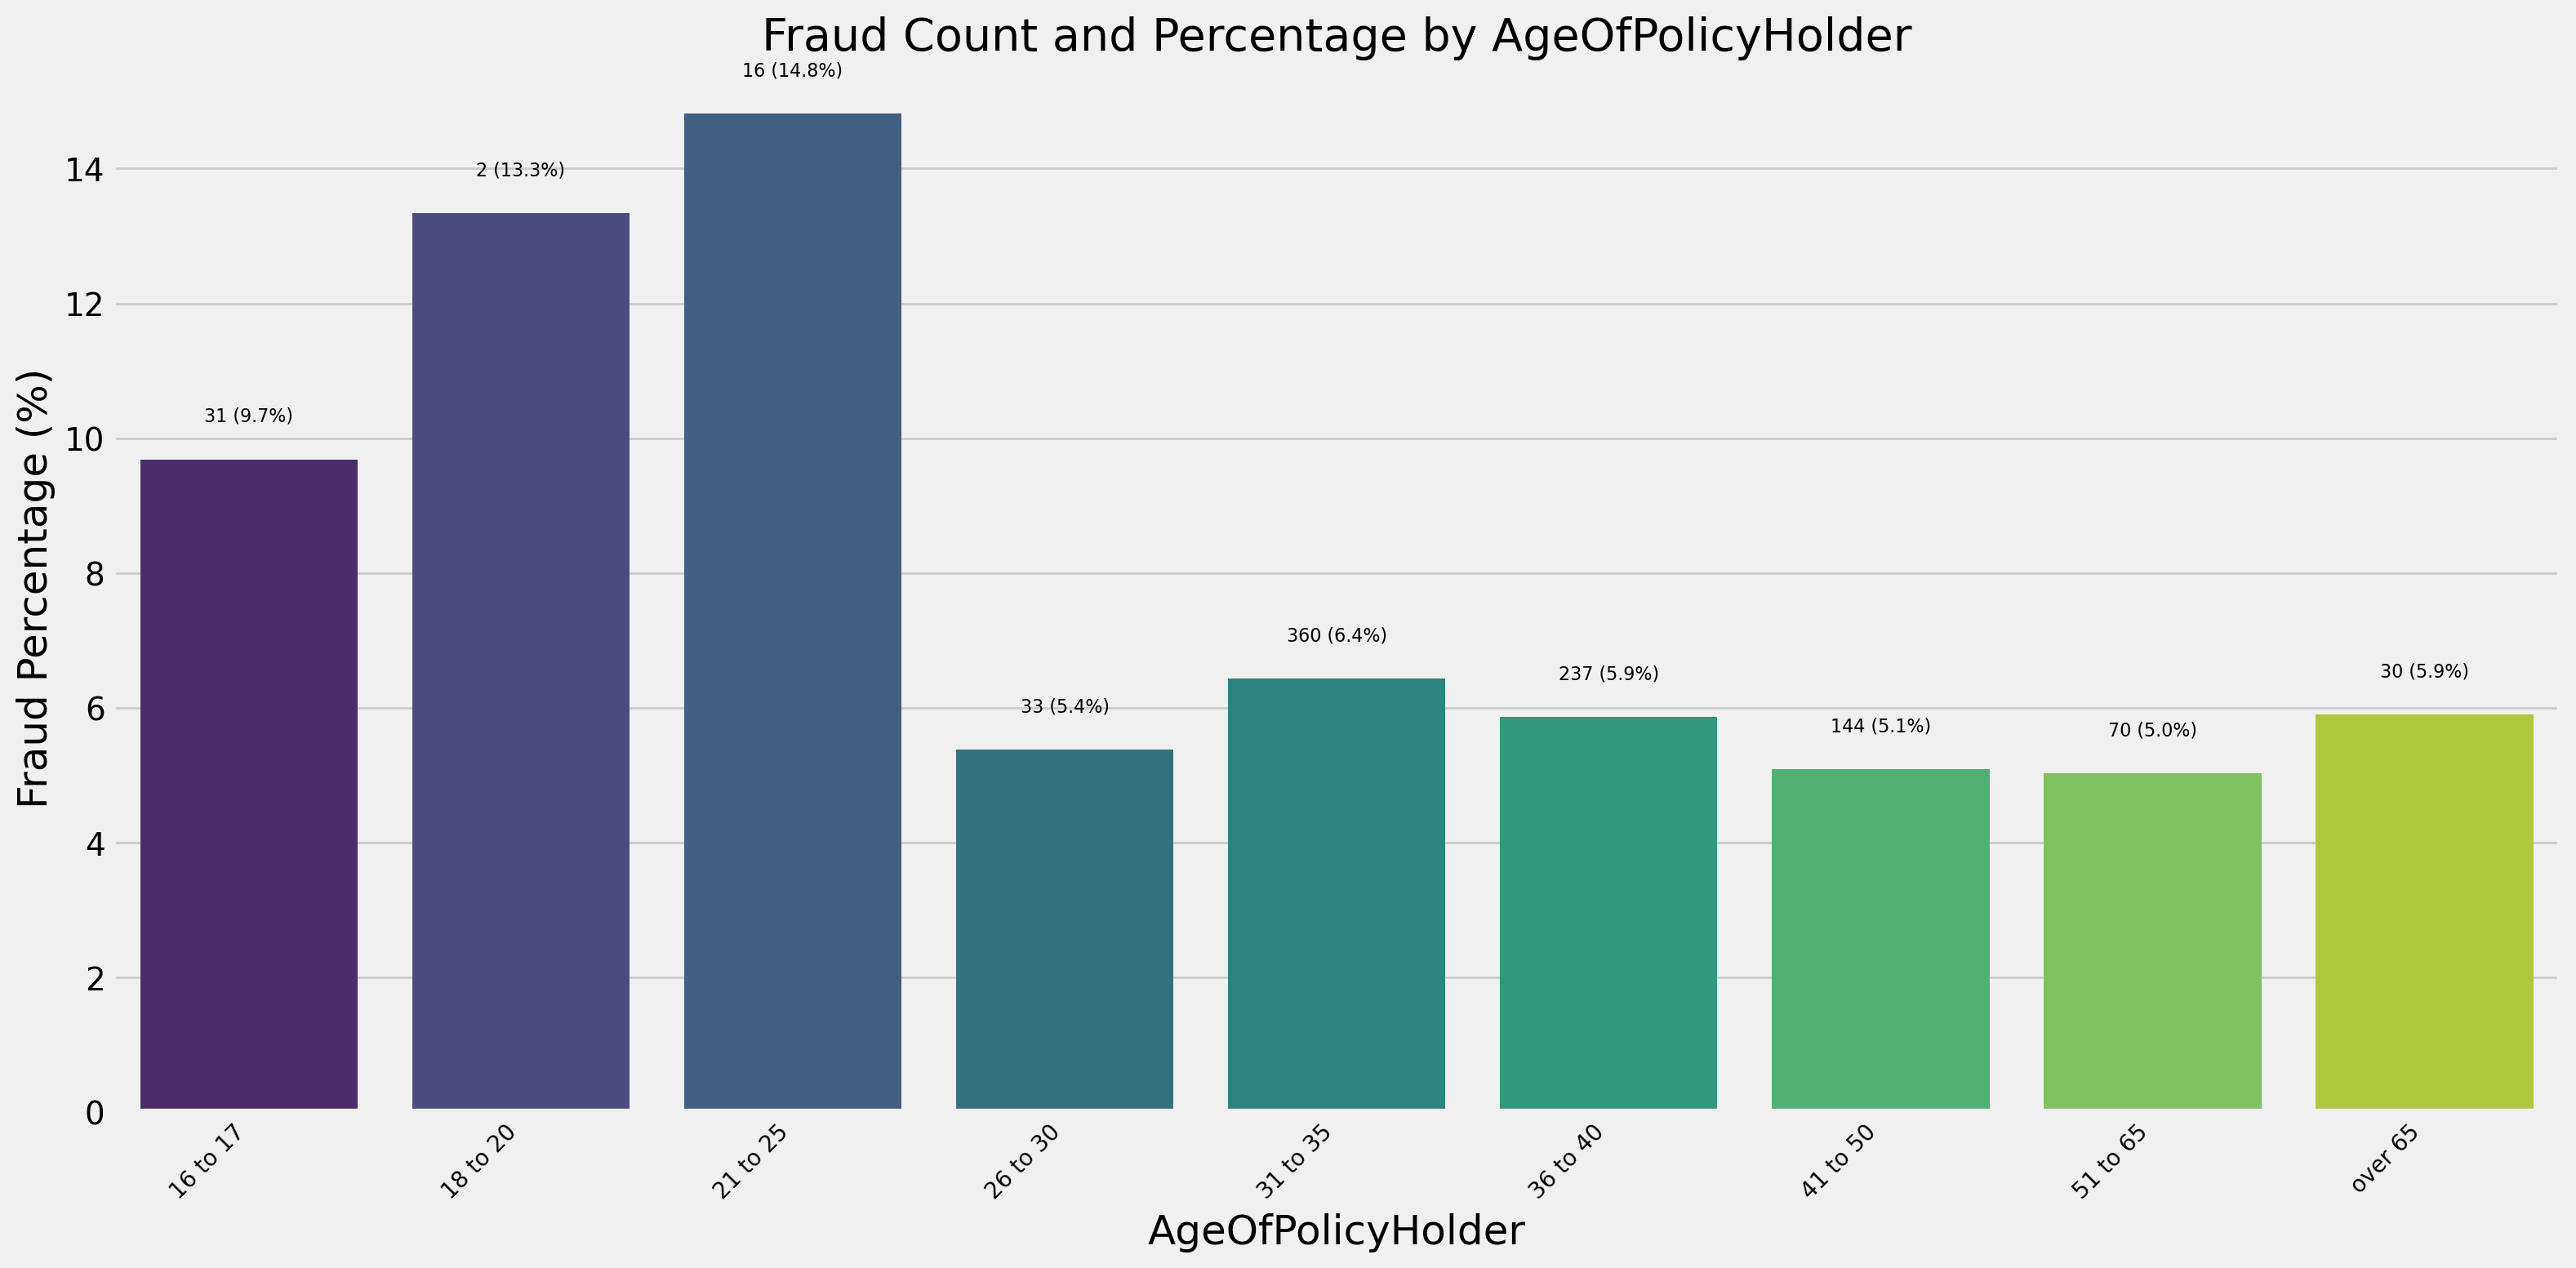

In [115]:
# Default (vertical + sort by percentage)

# Fraud detection by AgeOfPolicyHolder
plot_fraud_percentage_bar(fraud, 'AgeOfPolicyHolder', sort_by=None)

Uner 25 age group exhibits a high fraud rate in "Age of Policy Holder" feature

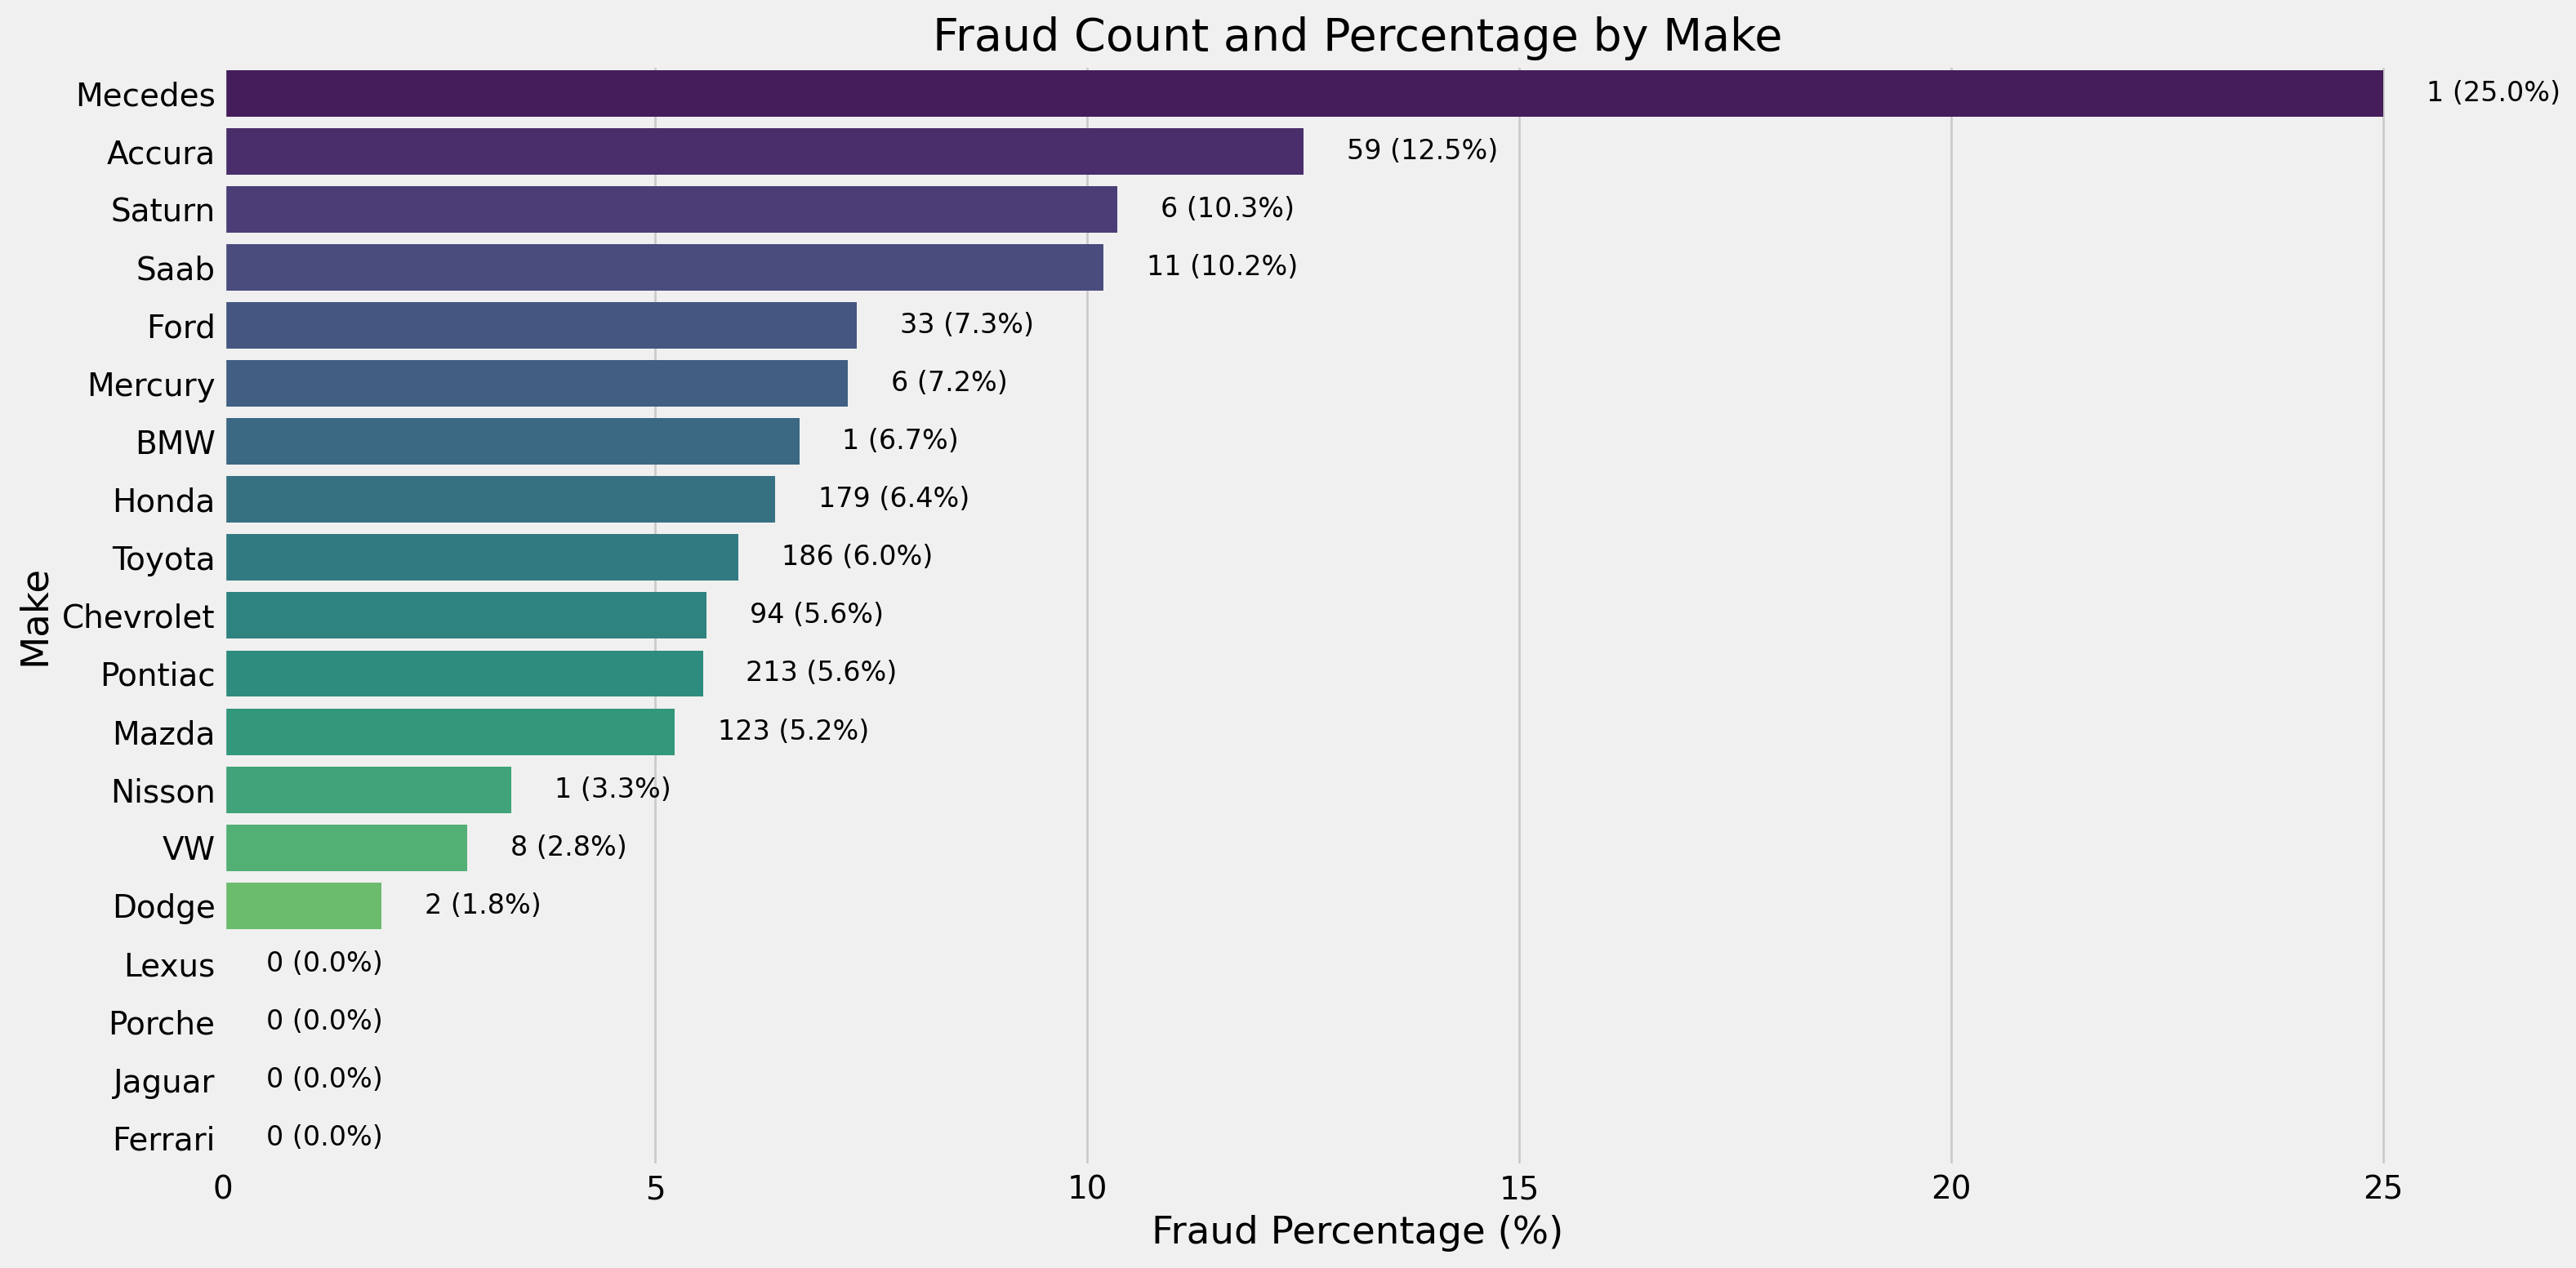

In [117]:
# Fraud detection by Make
plot_fraud_percentage_bar(fraud, 'Make', sort_by='percentage', horizontal=True)

The Mecedes owners are more likely to be involved in fraud,with almost double the incidence compared to the second-highest group, Accura owners. On the other hand, the Porche, Lexus, Jaguar, Ferrari owners have never been reported for fraud; 

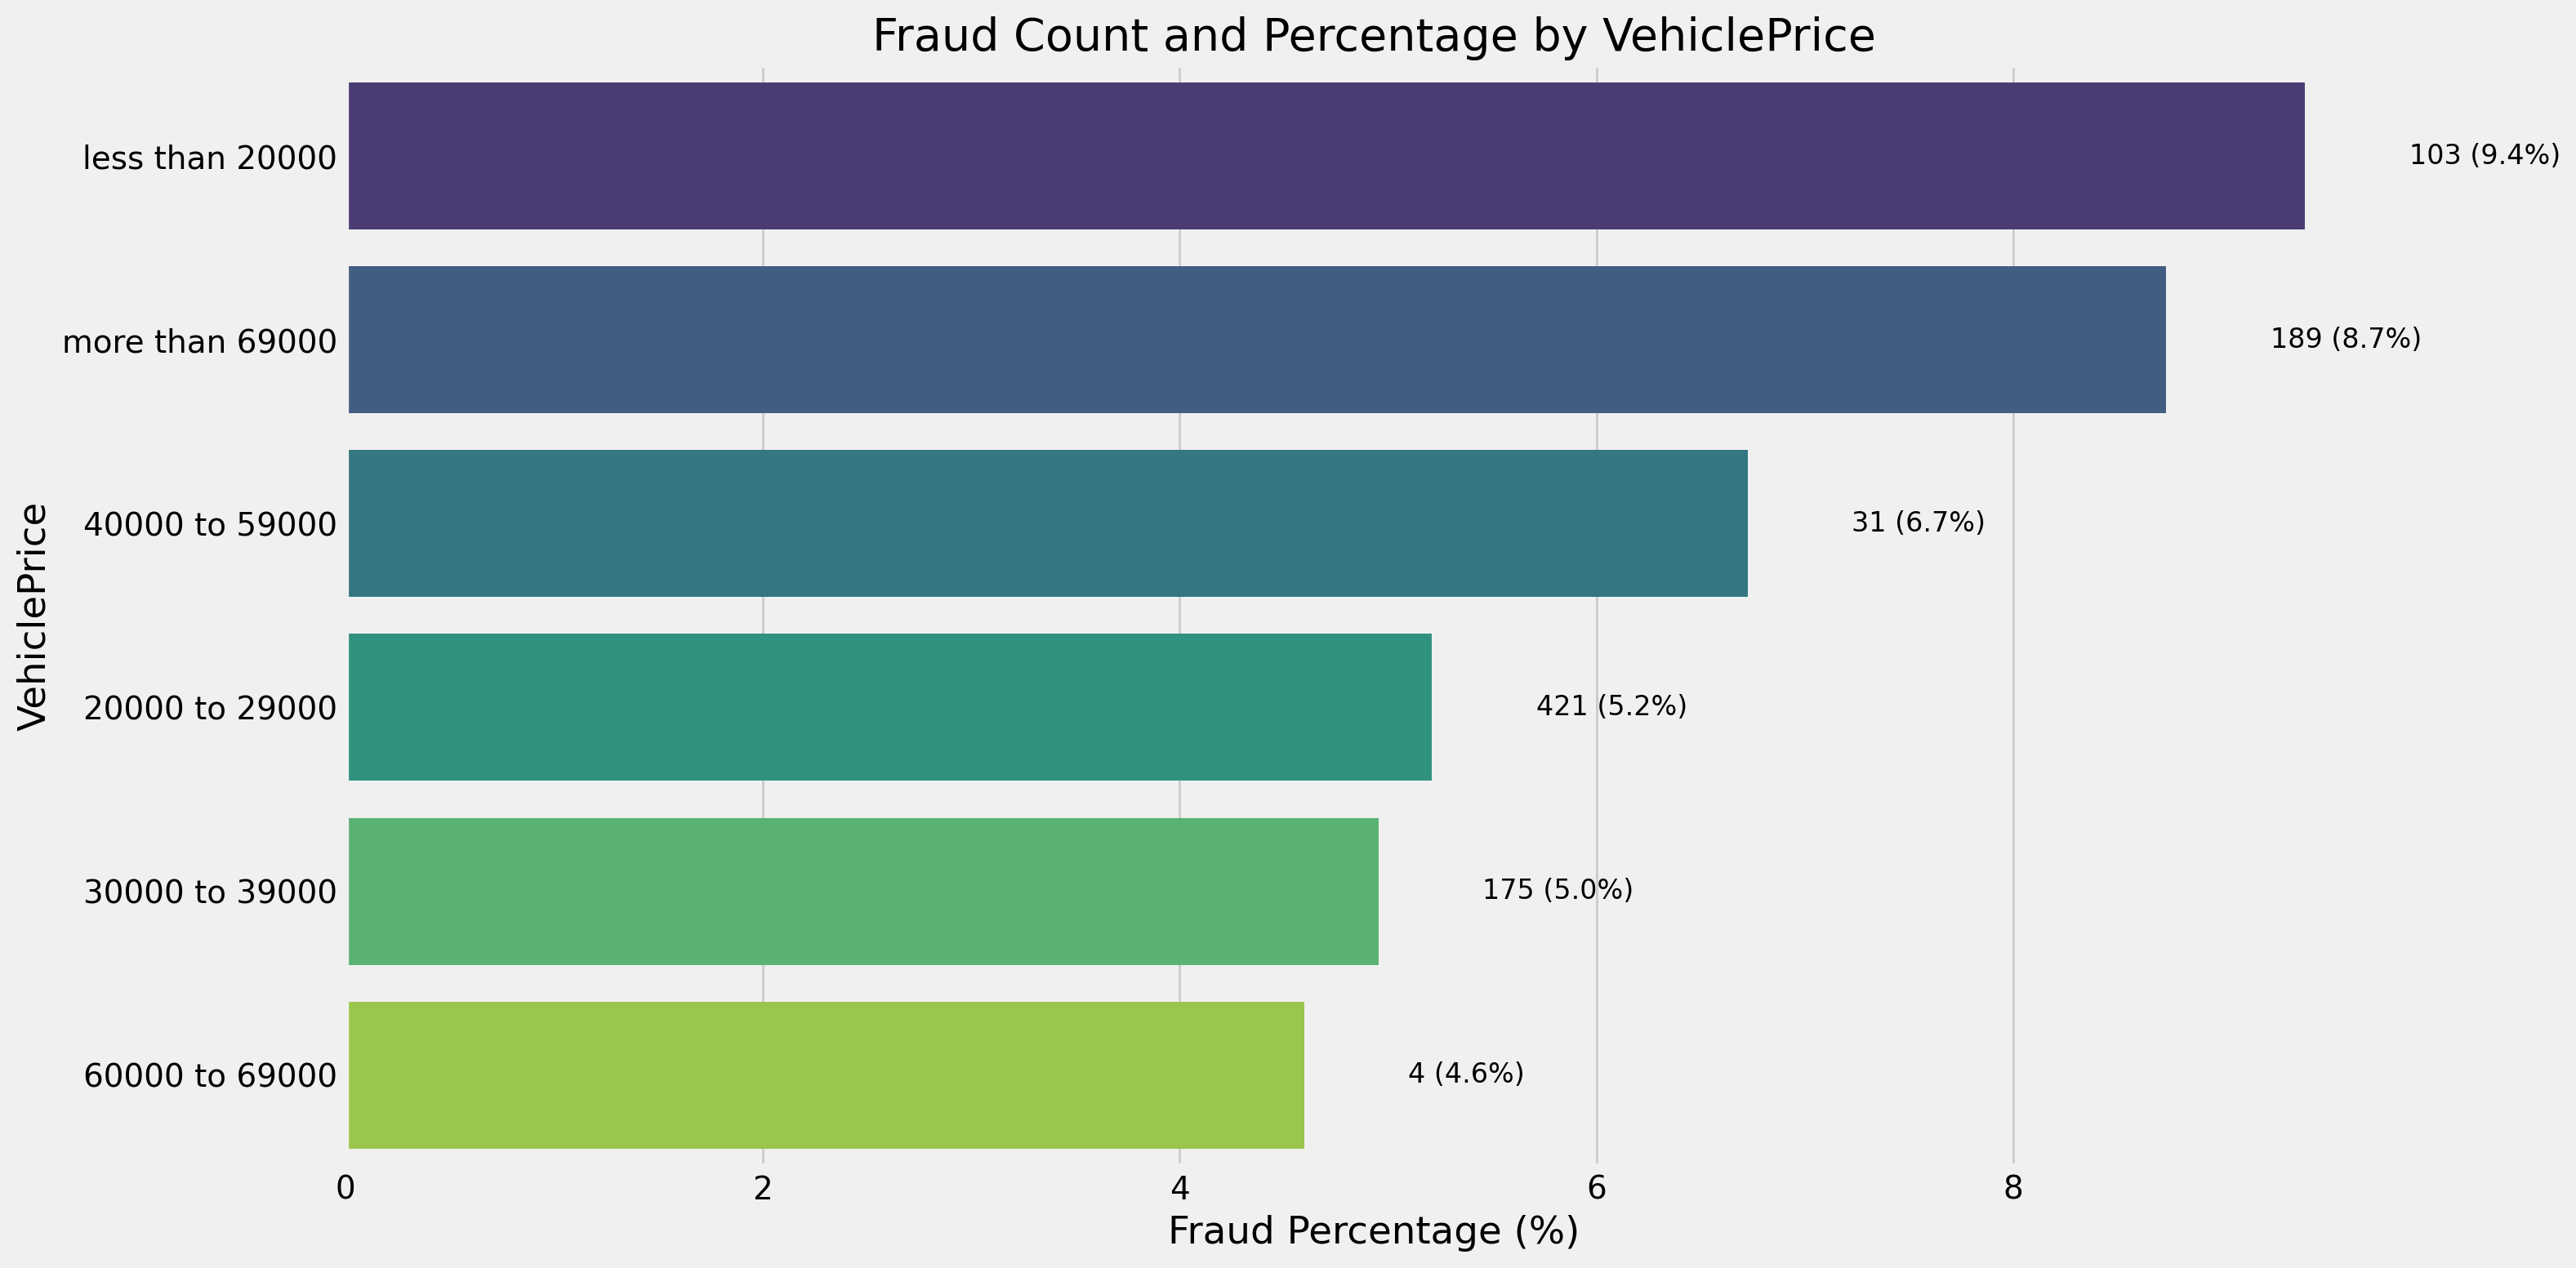

In [119]:
# Fraud detection by Vehicle Price
plot_fraud_percentage_bar(fraud, 'VehiclePrice', sort_by='percentage', horizontal=True)

Fraudulent cases were detected most frequently in either the most expensive or the cheapest vehicle category.
It can be converted to binarny rather than an ordinal one based on the fact that the categories "more than 69000" and "less than 20000" have the highest fraud rates, showing that the feature does not follow an ordinal pattern.

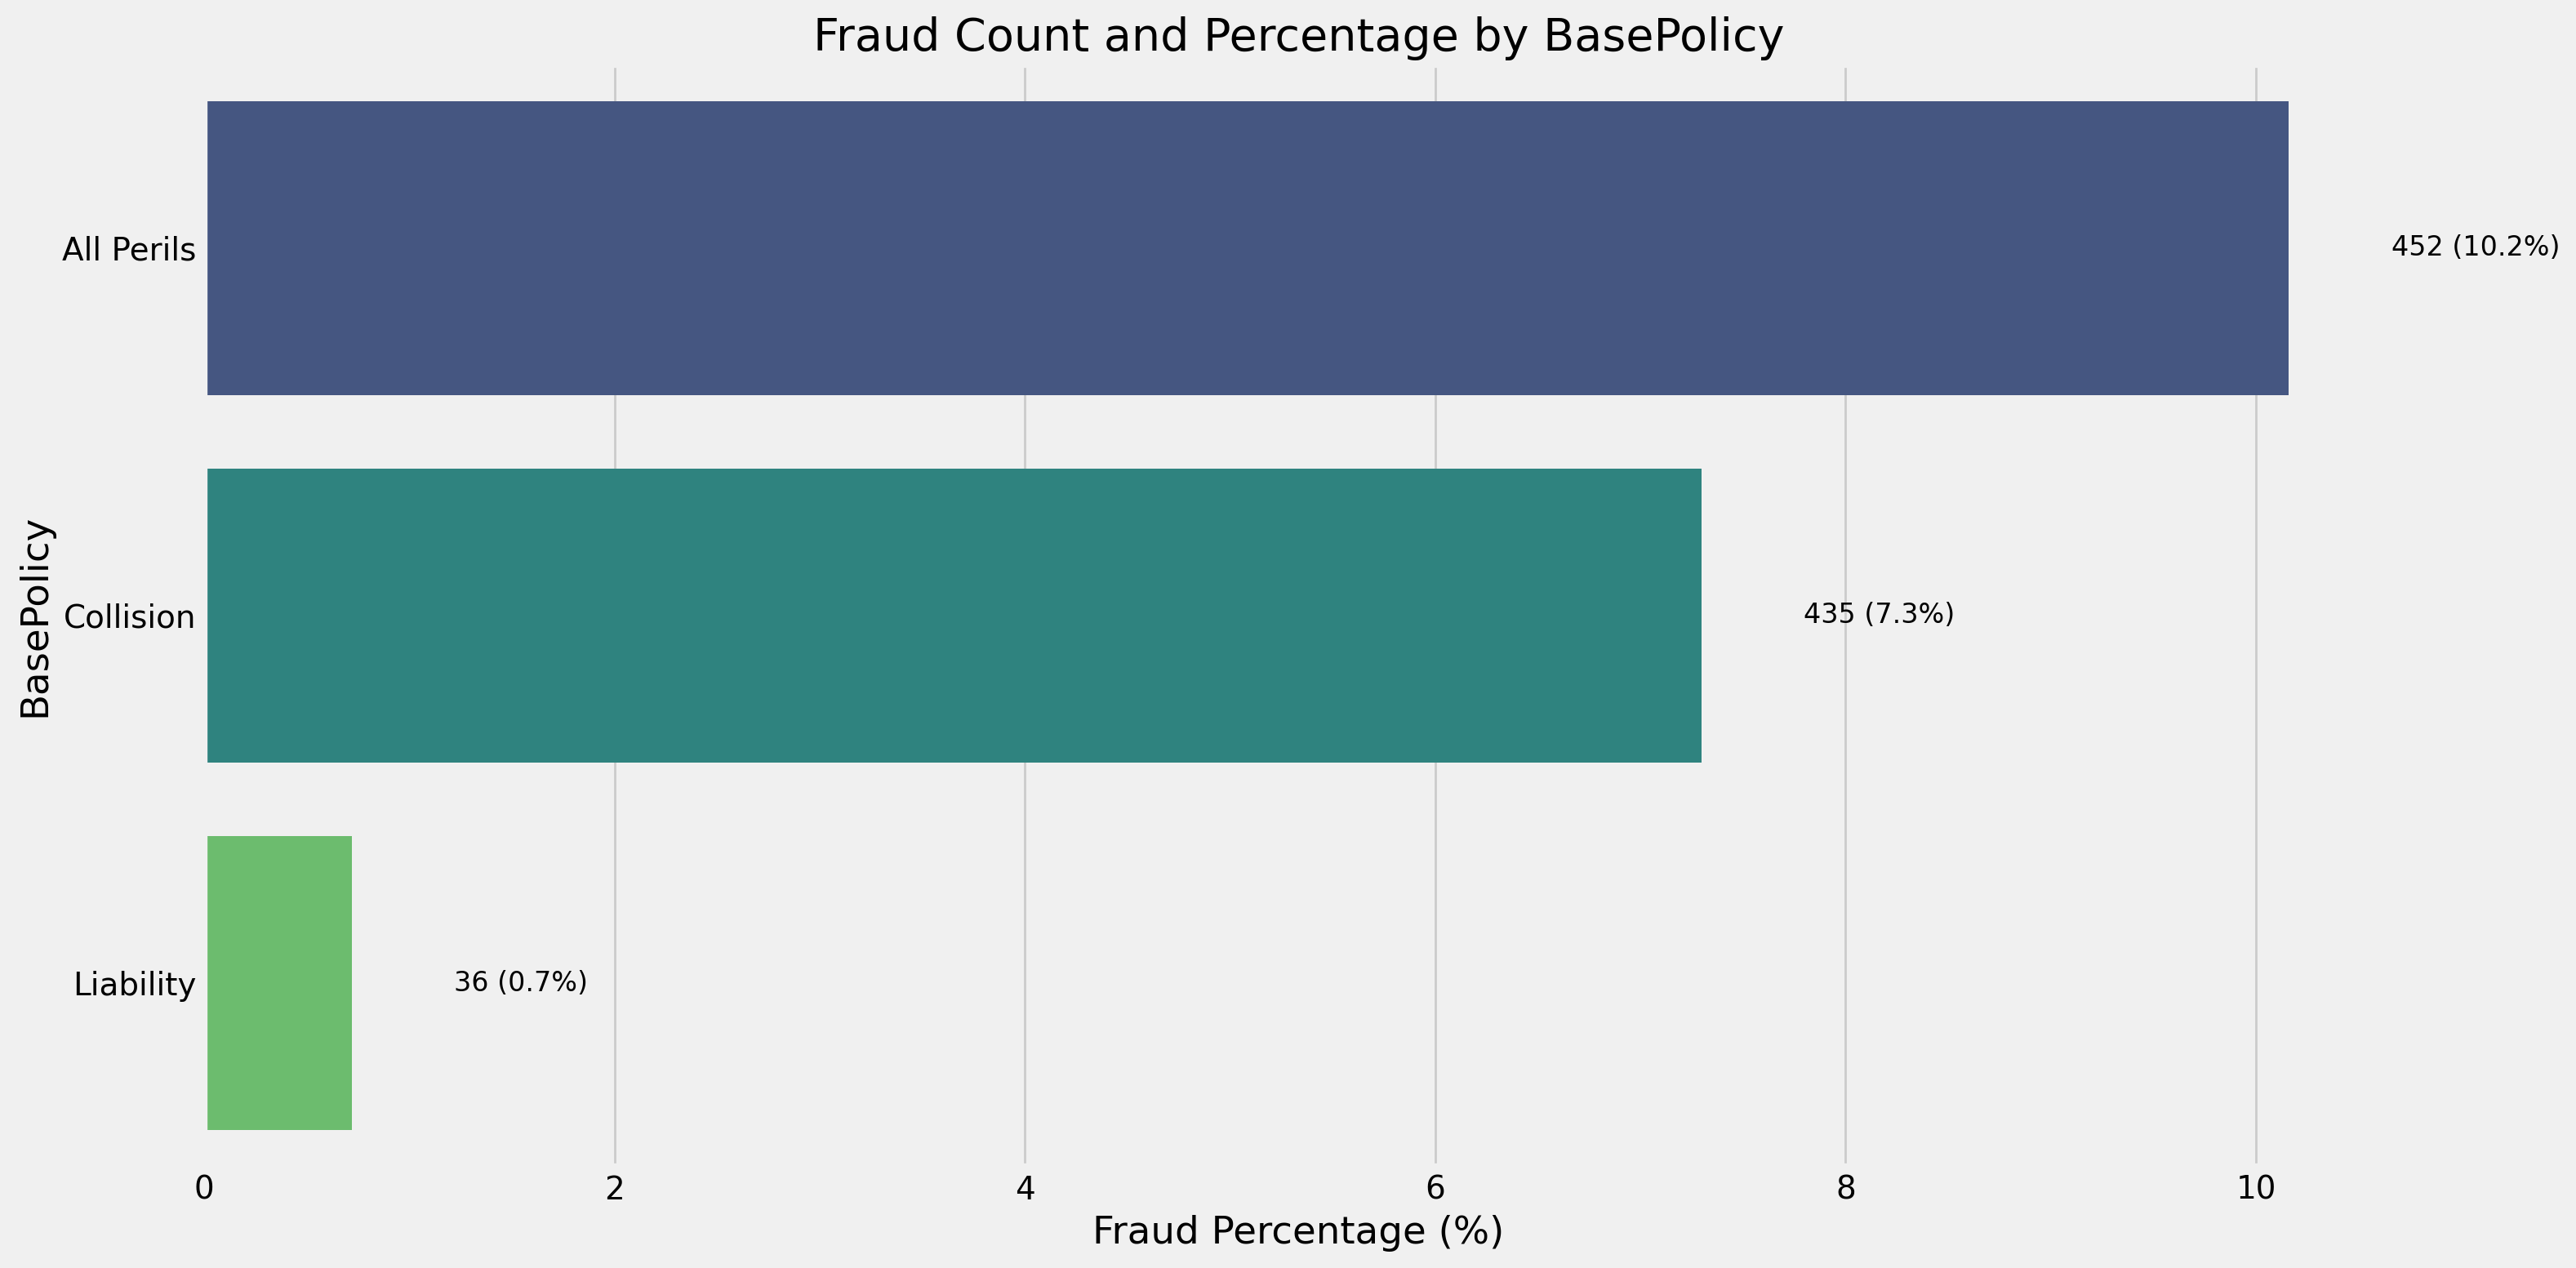

In [121]:
# Fraud detection by Base Policy
plot_fraud_percentage_bar(fraud, 'BasePolicy', sort_by='percentage', horizontal=True)

Fraudulent csaes were detected most frequently under the "All Perils". 

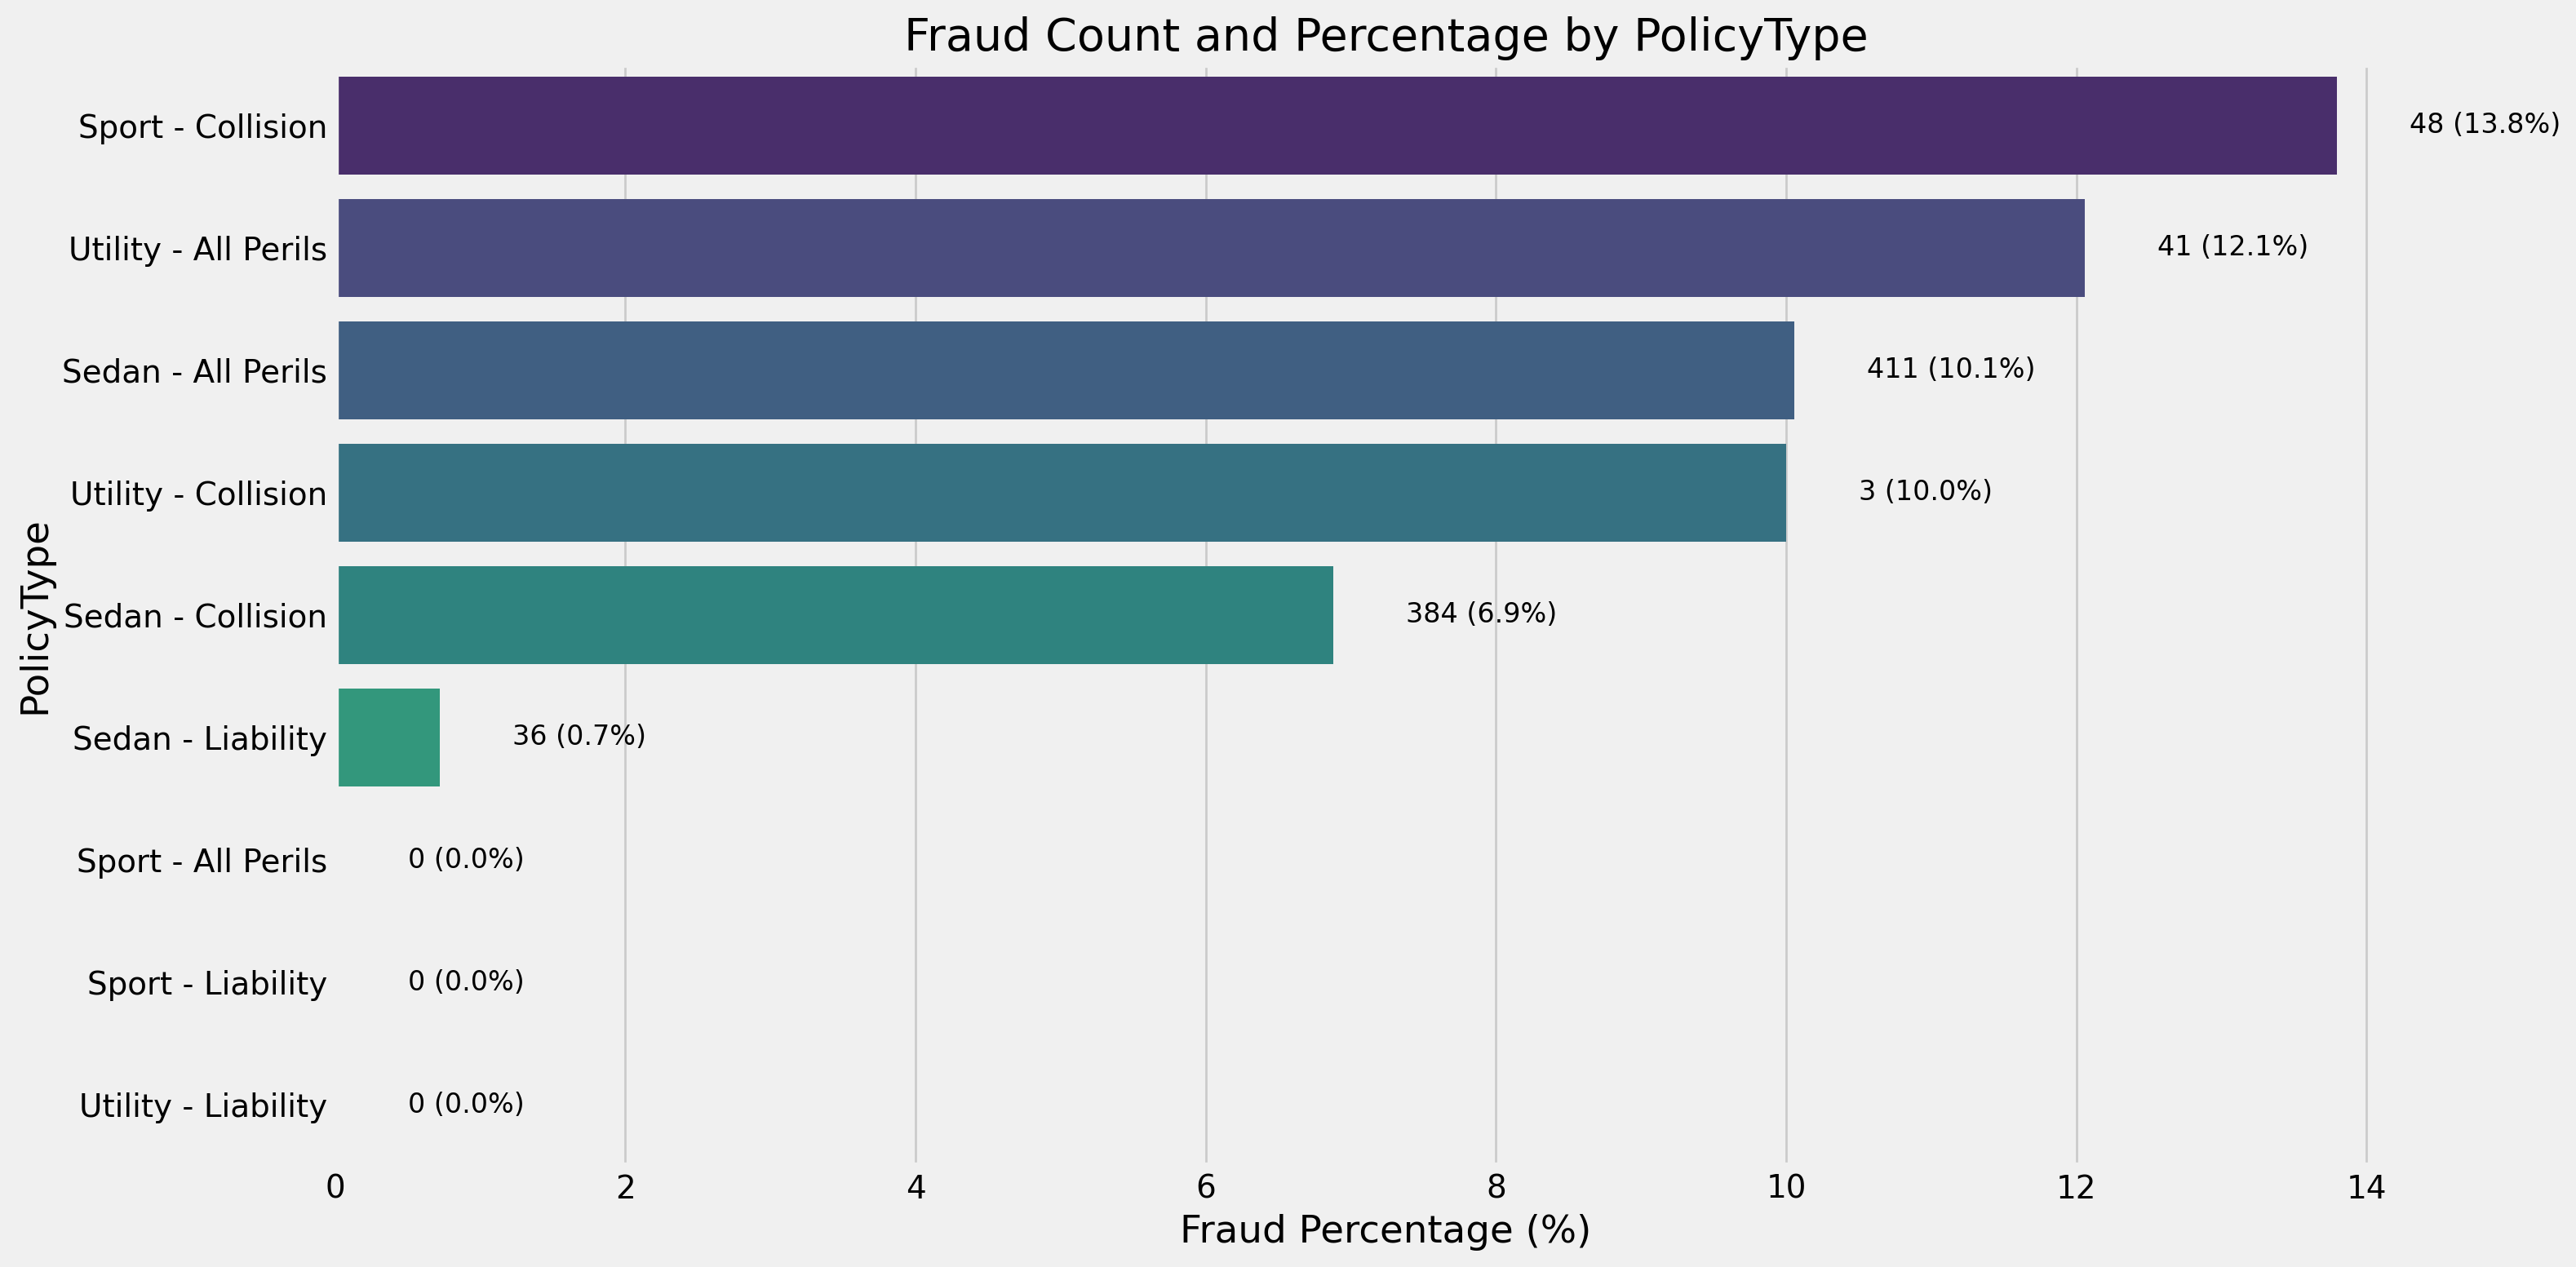

In [123]:
# Fraud detection by Base Policy
plot_fraud_percentage_bar(fraud, 'PolicyType', sort_by='percentage', horizontal=True)

Witin specificy policy types, "Sport-Collsion" had the highest fraud detection rate.

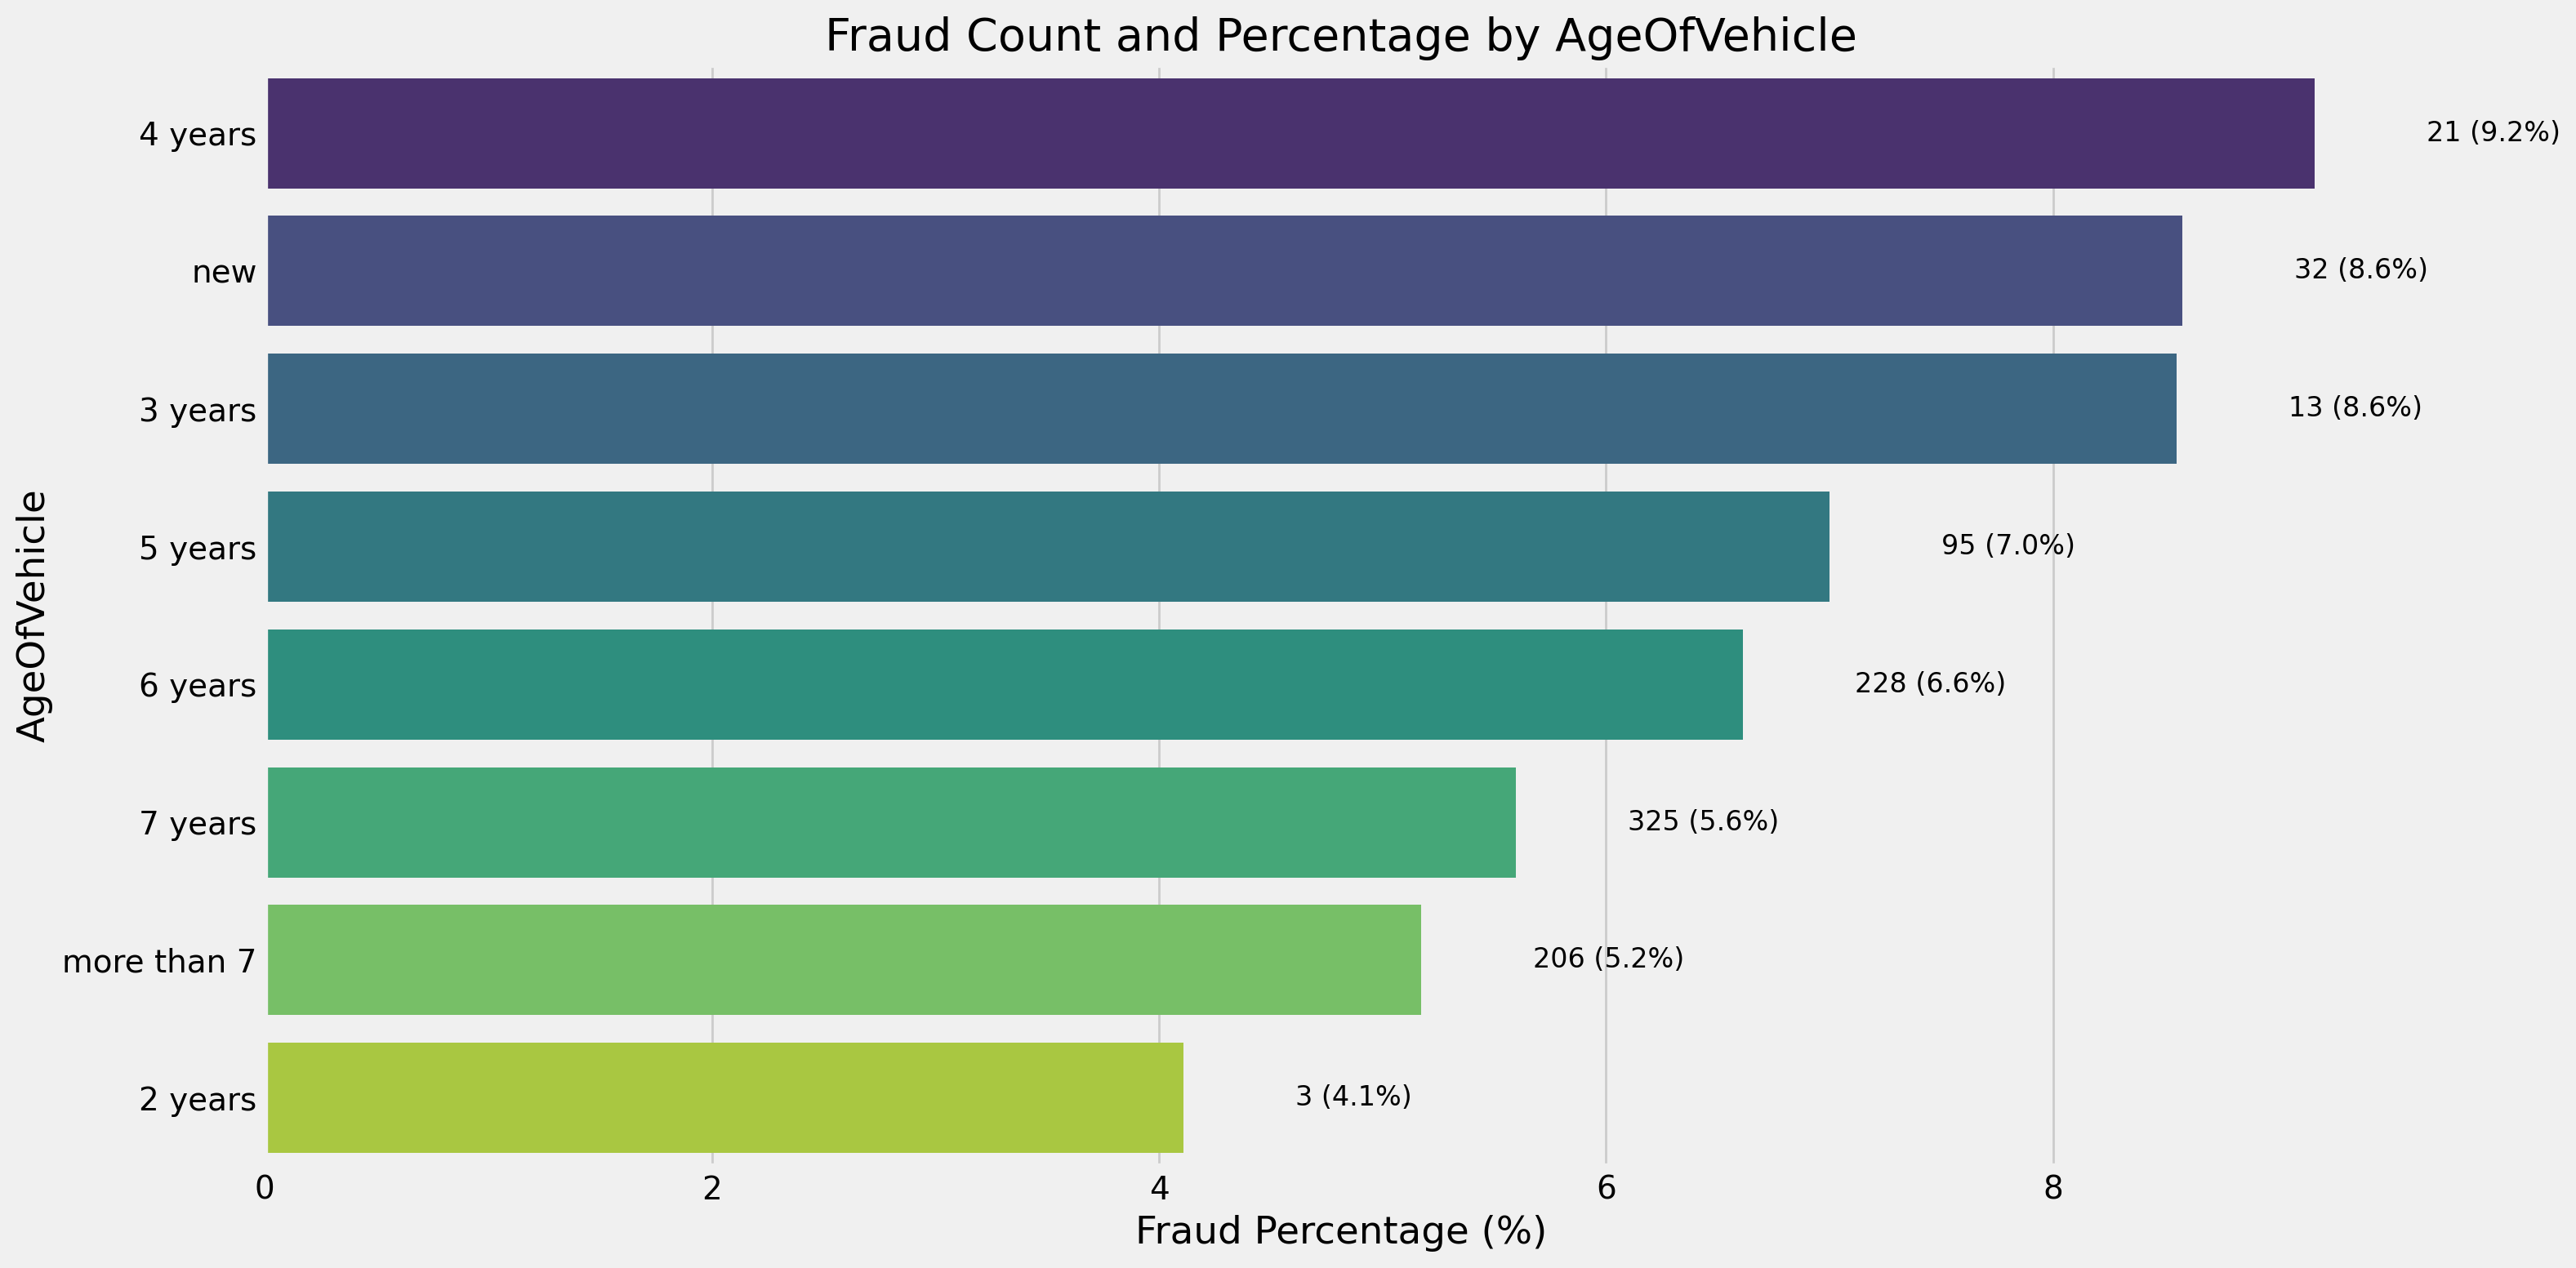

In [125]:
# Fraud detection by Age of Vehicle
plot_fraud_percentage_bar(fraud, 'AgeOfVehicle', sort_by='percentage', horizontal=True)

The feature "AgeOfVehicle" actually can be re-classified into 3 categories; The higest, mid, and low fraudulent groups.

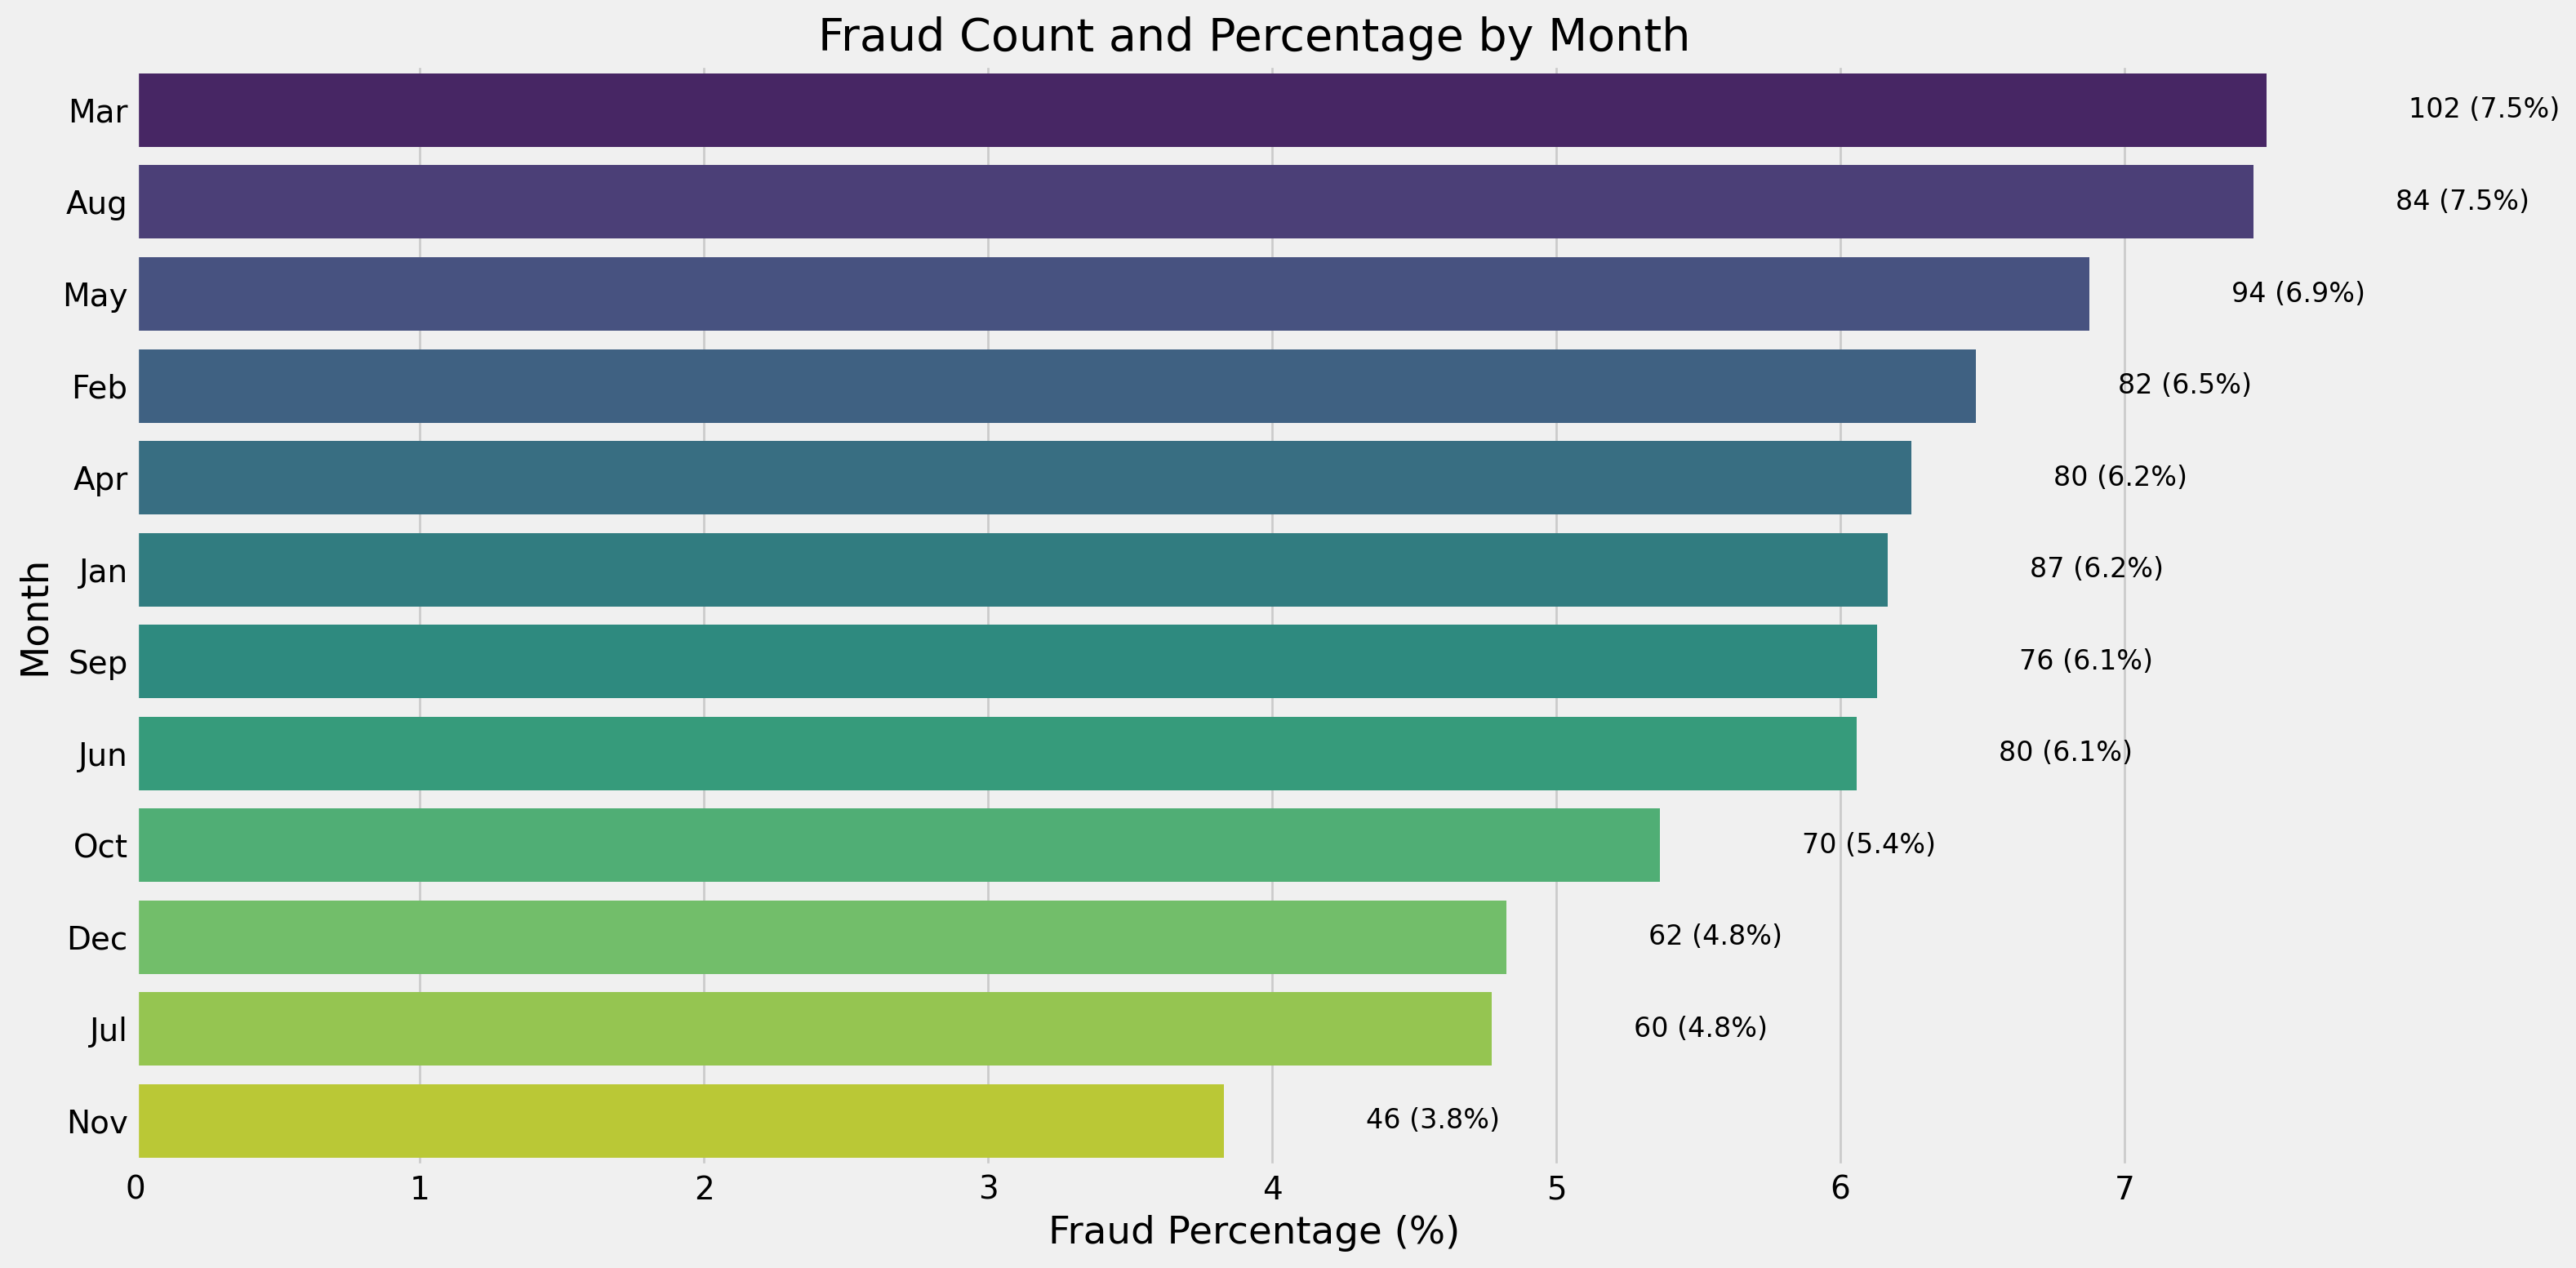

In [127]:
# Fraud detection by Month
plot_fraud_percentage_bar(fraud, 'Month', sort_by='percentage', horizontal=True)

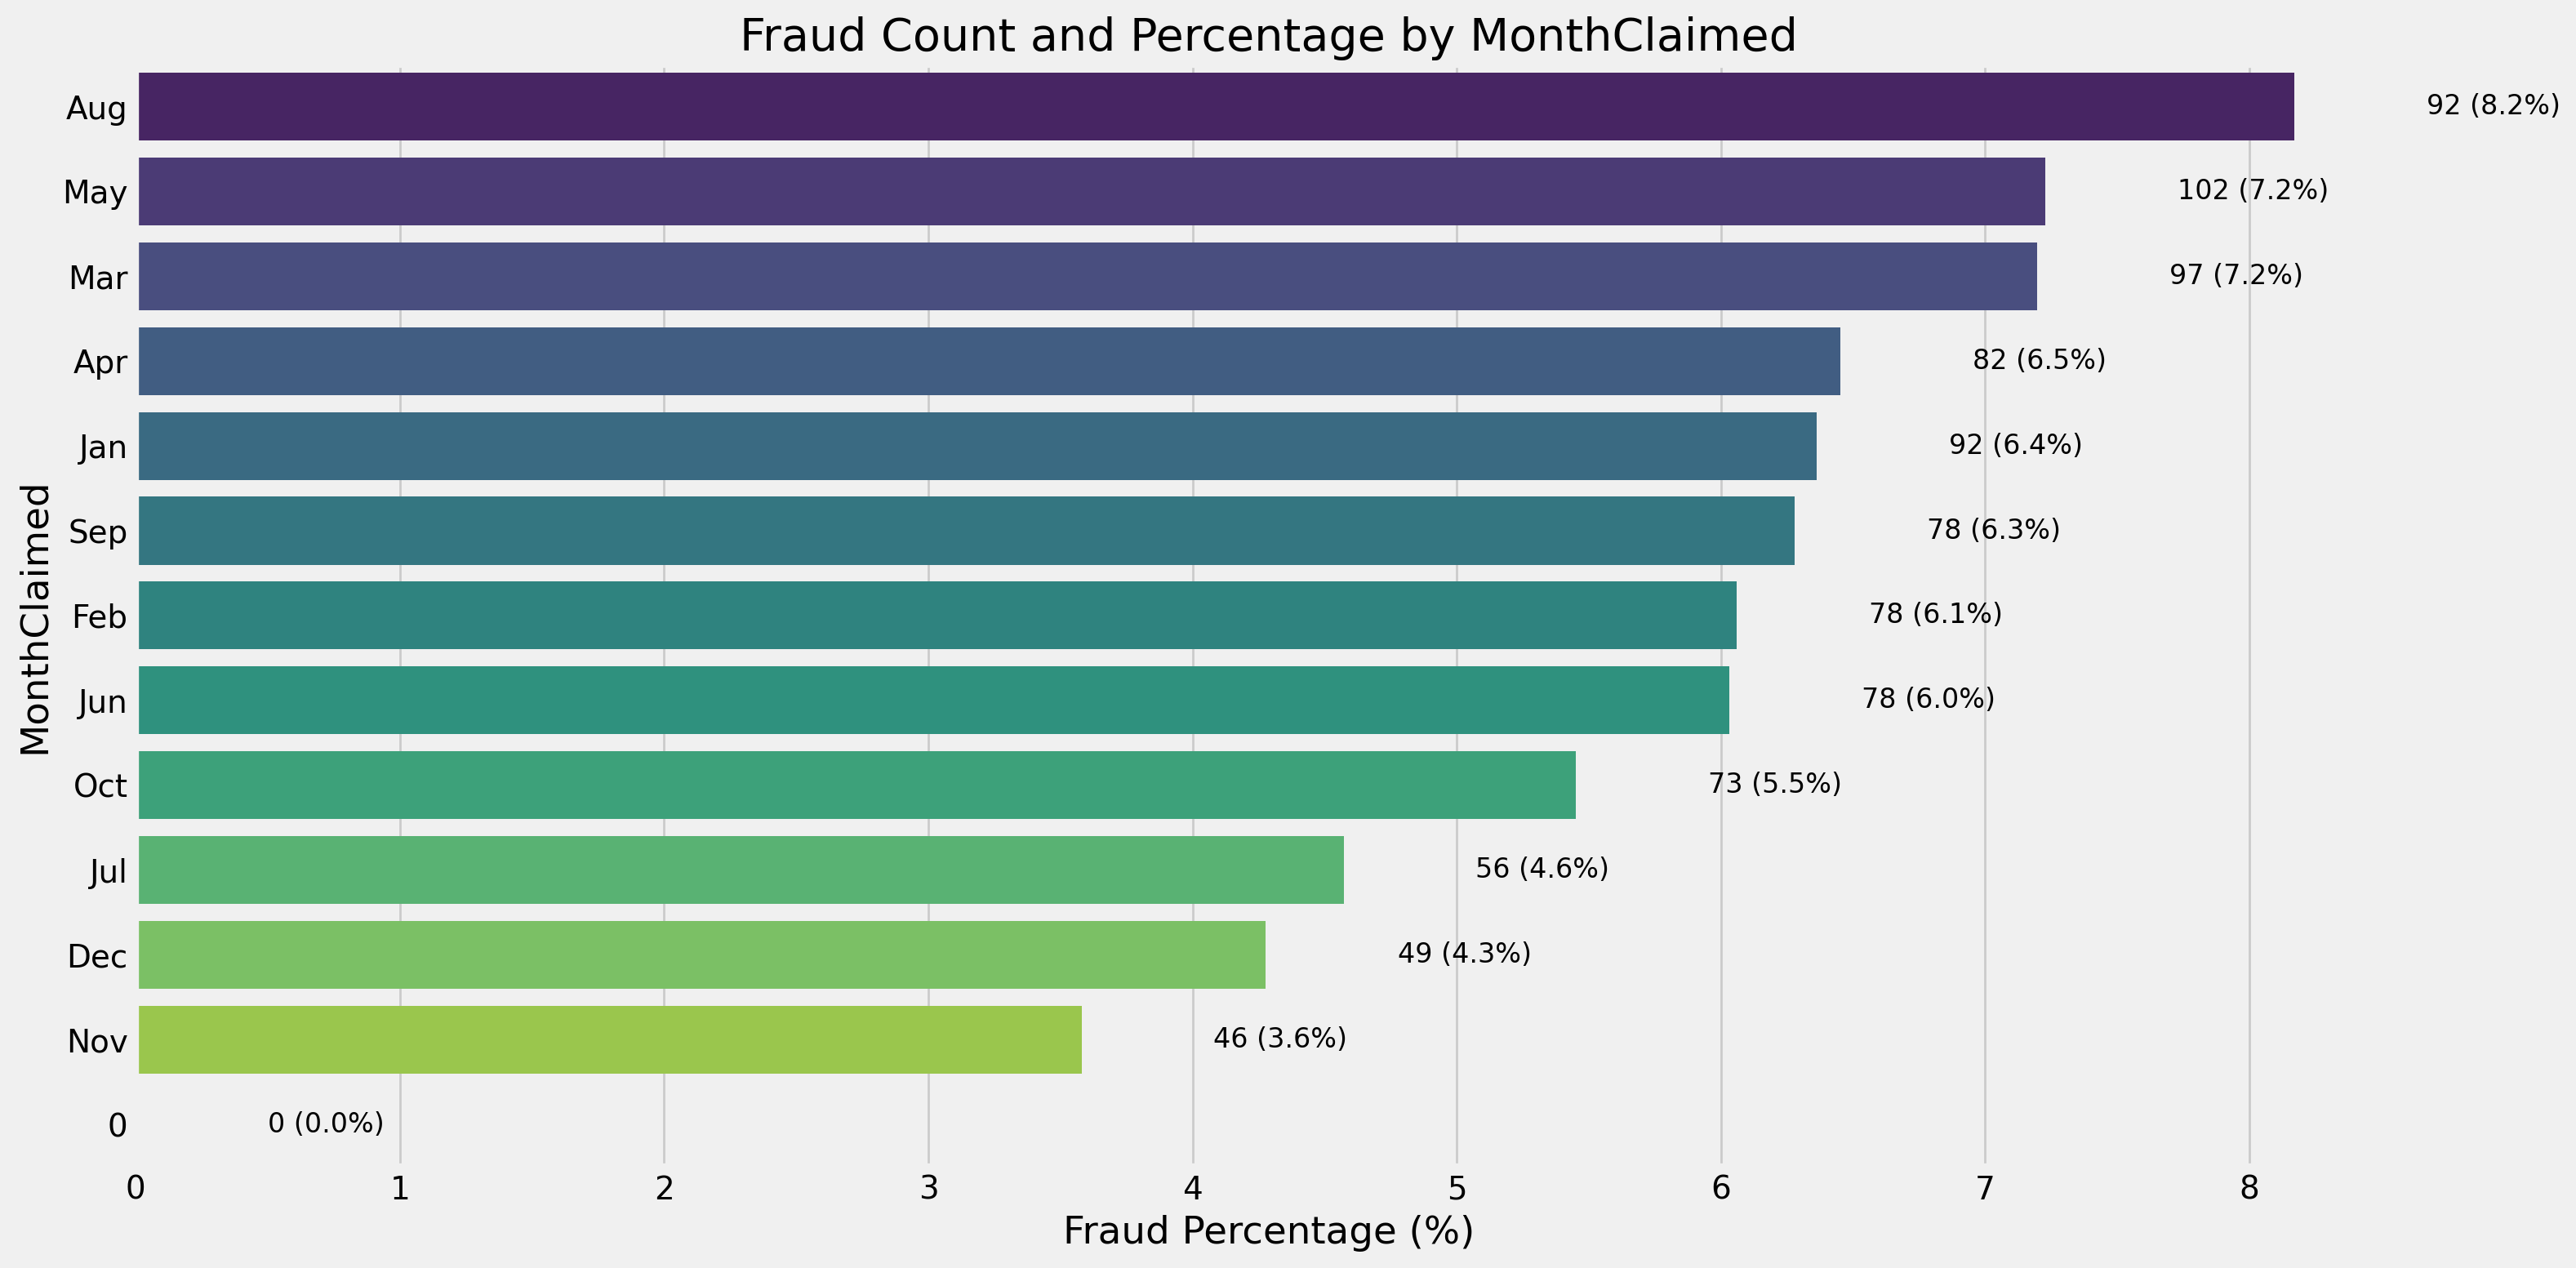

In [129]:
# Fraud detection by Month Claimed
plot_fraud_percentage_bar(fraud, 'MonthClaimed', sort_by='percentage', horizontal=True)

Month and MonthClaimed features are similar distributions. (We don't need both.)

In [131]:
# Drop useless columns
# Drop the policy number because it is a unique sequence, not useful information
#fraud.drop(labels='PolicyNumber', axis=1, inplace=True)

# Drop the RepNumber column because it is like the employee id of the insurance company representative who processed the claim, which is not useful.
#fraud.drop(labels='RepNumber', axis=1, inplace=True)

# Thinking logically, the Year column should also be dropped because it would not be useful to predict future fraud cases based on what year they occur in. This is not a time-series task.
#fraud.drop(labels='Year', axis=1, inplace=True)

# dropped "Month" because we already have similar feature "MonthClaimed"
# dropped features related to Date
useless_columns = ['Year', 'Month', 'WeekOfMonth', 'DayOfWeek', 'DayOfWeekClaimed', 'WeekOfMonthClaimed', 'PolicyNumber', 'RepNumber']
fraud.drop(labels=useless_columns, axis=1, inplace=True)

In [133]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Make                  15420 non-null  object
 1   AccidentArea          15420 non-null  object
 2   MonthClaimed          15420 non-null  object
 3   Sex                   15420 non-null  object
 4   MaritalStatus         15420 non-null  object
 5   Age                   15420 non-null  int64 
 6   Fault                 15420 non-null  object
 7   PolicyType            15420 non-null  object
 8   VehicleCategory       15420 non-null  object
 9   VehiclePrice          15420 non-null  object
 10  FraudFound_P          15420 non-null  int64 
 11  Deductible            15420 non-null  int64 
 12  DriverRating          15420 non-null  int64 
 13  Days_Policy_Accident  15420 non-null  object
 14  Days_Policy_Claim     15420 non-null  object
 15  PastNumberOfClaims    15420 non-null

In [135]:
# Encoding Binary Variable
# AccidentArea, Sex, Fault, PoliceReportFiled, WitnessPresent, AgentType, VehiclePrice 
binary_columns = [col for col in fraud.columns if fraud[col].nunique() == 2 and col != 'FraudFound_P']
binary_columns

['AccidentArea',
 'Sex',
 'Fault',
 'PoliceReportFiled',
 'WitnessPresent',
 'AgentType']

In [137]:
le = LabelEncoder()
for col in binary_columns:
    fraud[col] = le.fit_transform(fraud[col])
    print('Label Mapping: ', dict(zip(le.classes_, le.transform(le.classes_))))

Label Mapping:  {'Rural': 0, 'Urban': 1}
Label Mapping:  {'Female': 0, 'Male': 1}
Label Mapping:  {'Policy Holder': 0, 'Third Party': 1}
Label Mapping:  {'No': 0, 'Yes': 1}
Label Mapping:  {'No': 0, 'Yes': 1}
Label Mapping:  {'External': 0, 'Internal': 1}


In [139]:
for col in ['VehiclePrice', 'DriverRating', 'AgeOfVehicle', 'BasePolicy']:
    print(f"The unique values in {col}: {fraud[col].unique()}")

The unique values in VehiclePrice: ['more than 69000' '20000 to 29000' '30000 to 39000' 'less than 20000'
 '40000 to 59000' '60000 to 69000']
The unique values in DriverRating: [1 4 3 2]
The unique values in AgeOfVehicle: ['3 years' '6 years' '7 years' 'more than 7' '5 years' 'new' '4 years'
 '2 years']
The unique values in BasePolicy: ['Liability' 'Collision' 'All Perils']


In [141]:
# VehiclePrice: convert it to binarny rather than an ordinal one based on the fact that the categories "more than 69000" and "less than 20000" have the highest fraud rates, showing that the feature does not follow an ordinal pattern
VehiclePrice_label = {'more than 69000': 1, '20000 to 29000': 0,  '30000 to 39000': 0, 'less than 20000': 1, '40000 to 59000': 1, '60000 to 69000': 0}

# AgeOfVehicle: transform it into a nominal categorical variable for the same reason as "VehiclePrice." However, this feature can be re-classified into three categories.)
AgeOfVehicle_label = {'new': 2, '2 years': 0, '3 years': 2, '4 years': 2, '5 years': 1, '6 years': 1, '7 years': 0, 'more than 7': 0}

# BasePolicy: ordinal categorical variable.
BasePolicy_label = {'Liability': 0, 'Collision': 1, 'All Perils': 2}

In [145]:
fraud['VehiclePrice'] = fraud['VehiclePrice'].map(VehiclePrice_label)
fraud['AgeOfVehicle'] = fraud['AgeOfVehicle'].map(AgeOfVehicle_label)
fraud['BasePolicy'] = fraud['BasePolicy'].map(BasePolicy_label)

In [147]:
fraud['BasePolicy'].value_counts()

BasePolicy
1    5962
0    5009
2    4449
Name: count, dtype: int64

In [155]:
fraud['Deductible'].value_counts()

Deductible
400    14838
700      311
500      263
300        8
Name: count, dtype: int64

In [161]:
dummy_columns = ['Make', 'MonthClaimed', 'MaritalStatus', 'PolicyType', 'VehicleCategory', 'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfPolicyHolder', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars']
print('The number of dummy columns: ', len(dummy_columns))

The number of dummy columns:  12


In [170]:
fraud_with_dummies = pd.get_dummies(fraud, columns=dummy_columns)

In [172]:
fraud_with_dummies.shape

(15420, 97)

In [174]:
fraud_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 97 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   AccidentArea                        15420 non-null  int32
 1   Sex                                 15420 non-null  int32
 2   Age                                 15420 non-null  int64
 3   Fault                               15420 non-null  int32
 4   VehiclePrice                        15420 non-null  int64
 5   FraudFound_P                        15420 non-null  int64
 6   Deductible                          15420 non-null  int64
 7   DriverRating                        15420 non-null  int64
 8   AgeOfVehicle                        15420 non-null  int64
 9   PoliceReportFiled                   15420 non-null  int32
 10  WitnessPresent                      15420 non-null  int32
 11  AgentType                           15420 non-null  int32
 12  Base

In [190]:
fraud[fraud['Age'] == 0]['Age'].value_counts()

Age
0    320
Name: count, dtype: int64

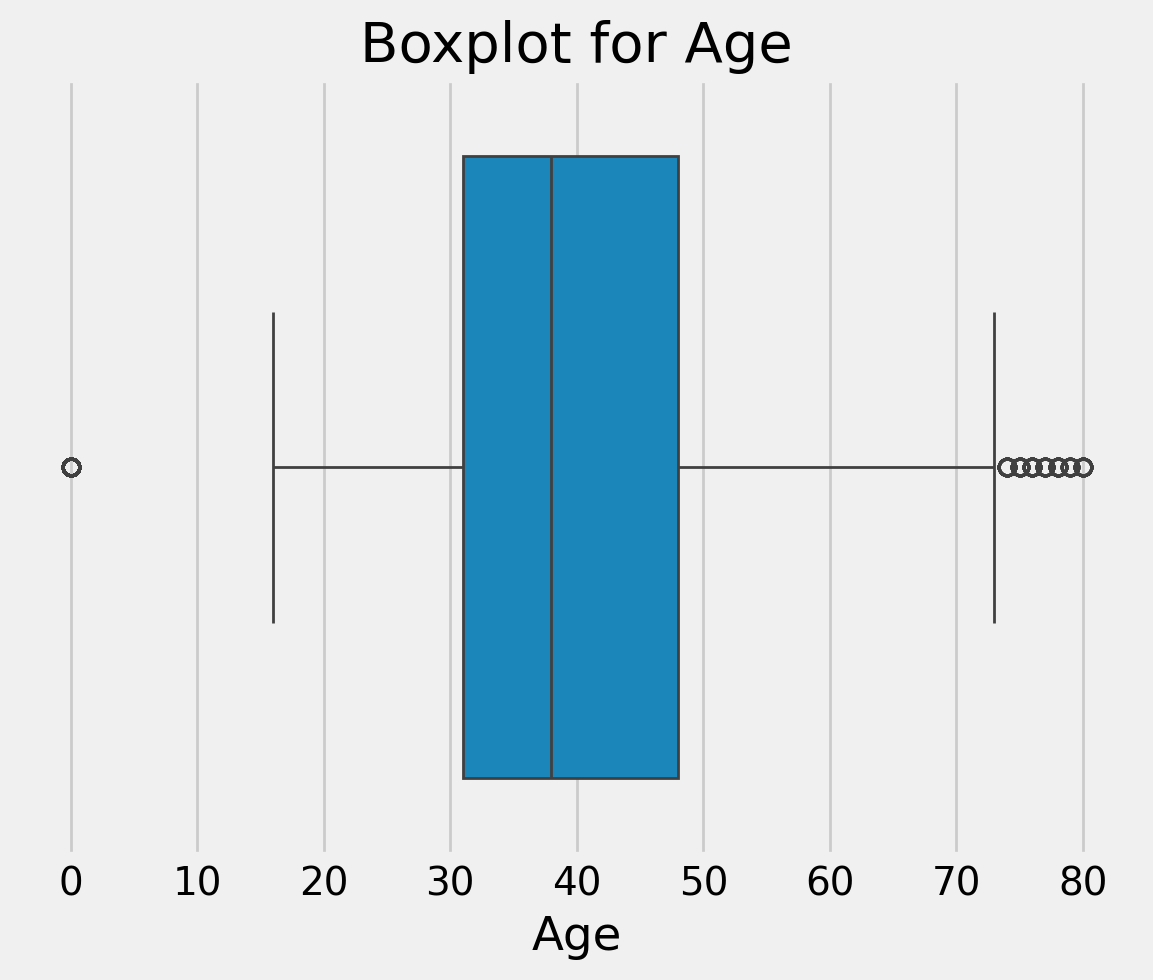

In [192]:
# Create a boxplot for the 'Age' column
sns.boxplot(x=fraud['Age'])

# Show the plot
plt.title('Boxplot for Age')
plt.show()

In [194]:
# Delete the rows with Age==0
fraud_with_dummies = fraud_with_dummies[fraud_with_dummies['Age'] != 0]

In [198]:
fraud_with_dummies.shape

(15100, 97)

In [225]:
fraud_with_dummies['AccidentArea'].dtype

dtype('int32')

In [230]:
#  top 10 features using a Random Forest machine learning model 
feature_cols = [col for col in fraud_with_dummies.columns if col != 'FraudFound_P' ]
target_col = 'FraudFound_P'

X = fraud_with_dummies[feature_cols]
y= fraud_with_dummies[target_col]

In [234]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

importances = model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort by importance and get top 10
top_10_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

print(top_10_features)

                      Feature  Importance
2                         Age    0.135473
6                DriverRating    0.072555
3                       Fault    0.039247
7                AgeOfVehicle    0.030254
85   NumberOfSuppliments_none    0.023640
25               Make_Pontiac    0.023532
70  PastNumberOfClaims_2 to 4    0.022608
72    PastNumberOfClaims_none    0.021929
4                VehiclePrice    0.021427
29                Make_Toyota    0.021408


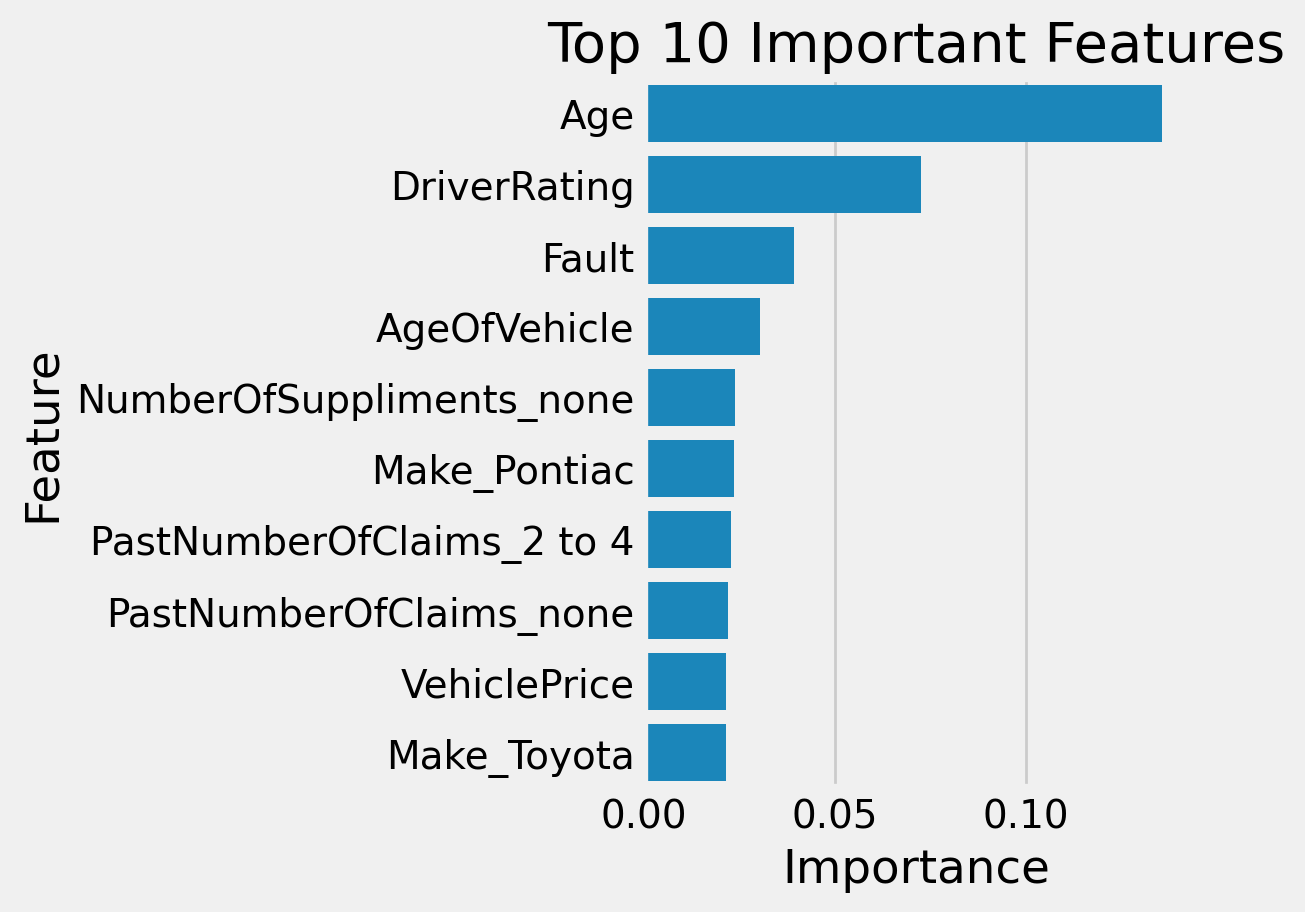

In [236]:
# Visualization of feature_importance
sns.barplot(x='Importance', y='Feature', data=top_10_features)
plt.title('Top 10 Important Features')
plt.tight_layout()
plt.show()

In [ ]:
# Convert the DataFrame object into NumPy array otherwise you will not be able to impute
values = df.values

# define the criteria for dealing with the missing values
imputer = SimpleImputer(
    missing_values = np.nan,
    strategy = 'median'
)
# Now impute it
imputedData = imputer.fit_transform(values)

In [ ]:
# normalization
# Apply normalisation (convert all ranges to [0-1]) for visualisation purposes.
scaler = MinMaxScaler(feature_range = (0, 1))
normalizedData = scaler.fit_transform(imputedData)

In [ ]:
# move the data back to a dataframe
df_n = pd.DataFrame.from_records(normalizedData, columns = columns[1:])
df_n['Class'] = df_n['Class'].astype(np.int8)
df_n.sample(5)

In [ ]:
# Pearson Correlation Heatmap
colormap = plt.cm.RdBu
plt.figure(figsize = (10, 10))
plt.title('Pearson Correlation of Features', size = 15)
sns.heatmap(df_n.astype(float).corr(),
            linewidths = 0.1,
            vmax = 1.0,
            square = True,
            cmap = colormap,
            linecolor = 'white',
            annot = True)
plt.show()

In [ ]:
# corr
## Visualise the data points

# visualise features in pairs
sns.pairplot(df_n)
plt.show()

In [ ]:
# split data
## Create training and testing subsets
test_size = 0.3

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = test_size,
                                                    random_state = 100666001,
                                                    stratify = y)

In [45]:
# Selecting numerical features
numerical_data = fraud.select_dtypes(include='number')
# Append the features of numerical_data to list
numerical_features=numerical_data.columns.tolist()

print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)

There are 6 numerical features: 

['WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 'FraudFound_P', 'Deductible', 'DriverRating']


In [47]:
numerical_data.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,Deductible,DriverRating
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,407.704280,2.487808
std,1.287585,1.259115,13.492377,0.237230,43.950998,1.119453
min,1.000000,1.000000,0.000000,0.000000,300.000000,1.000000
25%,2.000000,2.000000,31.000000,0.000000,400.000000,1.000000
50%,3.000000,3.000000,38.000000,0.000000,400.000000,2.000000
75%,4.000000,4.000000,48.000000,0.000000,400.000000,3.000000
max,5.000000,5.000000,80.000000,1.000000,700.000000,4.000000


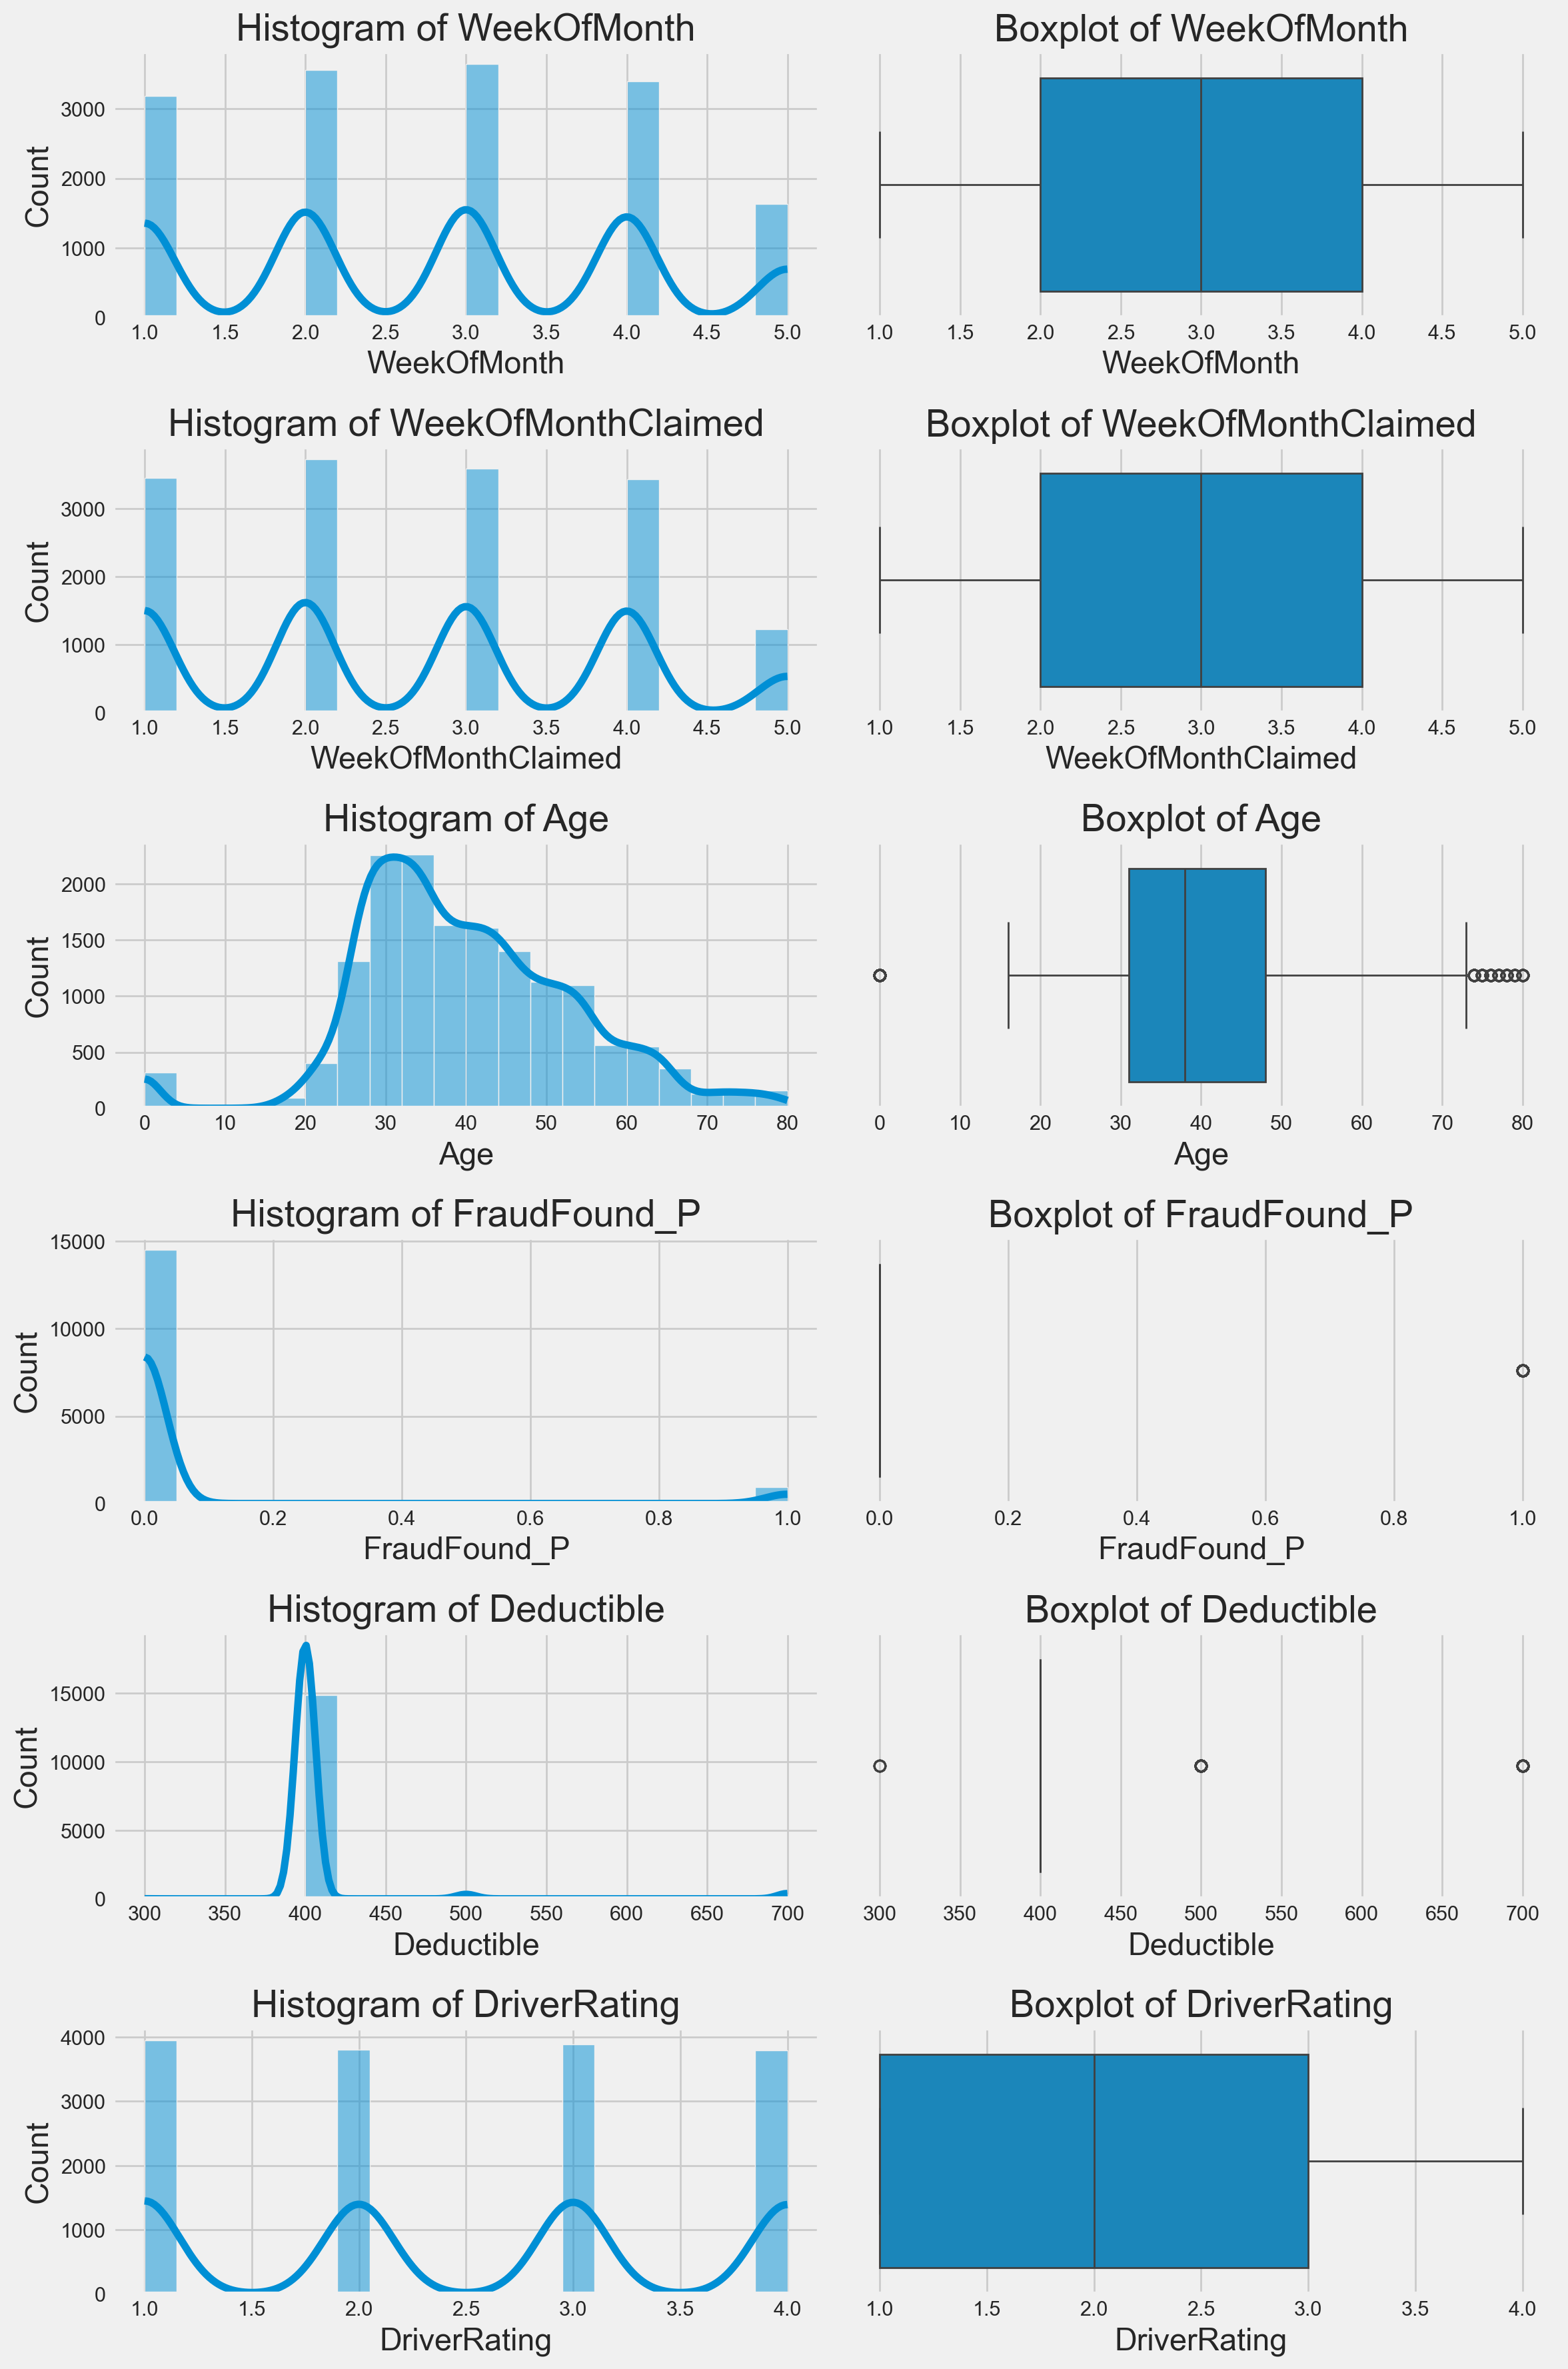

In [49]:
# Histogram & Boxplot
fig, axes = plt.subplots(nrows=len(numerical_features), ncols=2, figsize=(12, len(numerical_features) * 3))

for i, col in enumerate(numerical_features):
    # Histogram
    sns.histplot(numerical_data[col], bins=20, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram of {col}')

    # Boxplot
    sns.boxplot(x=numerical_data[col], ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

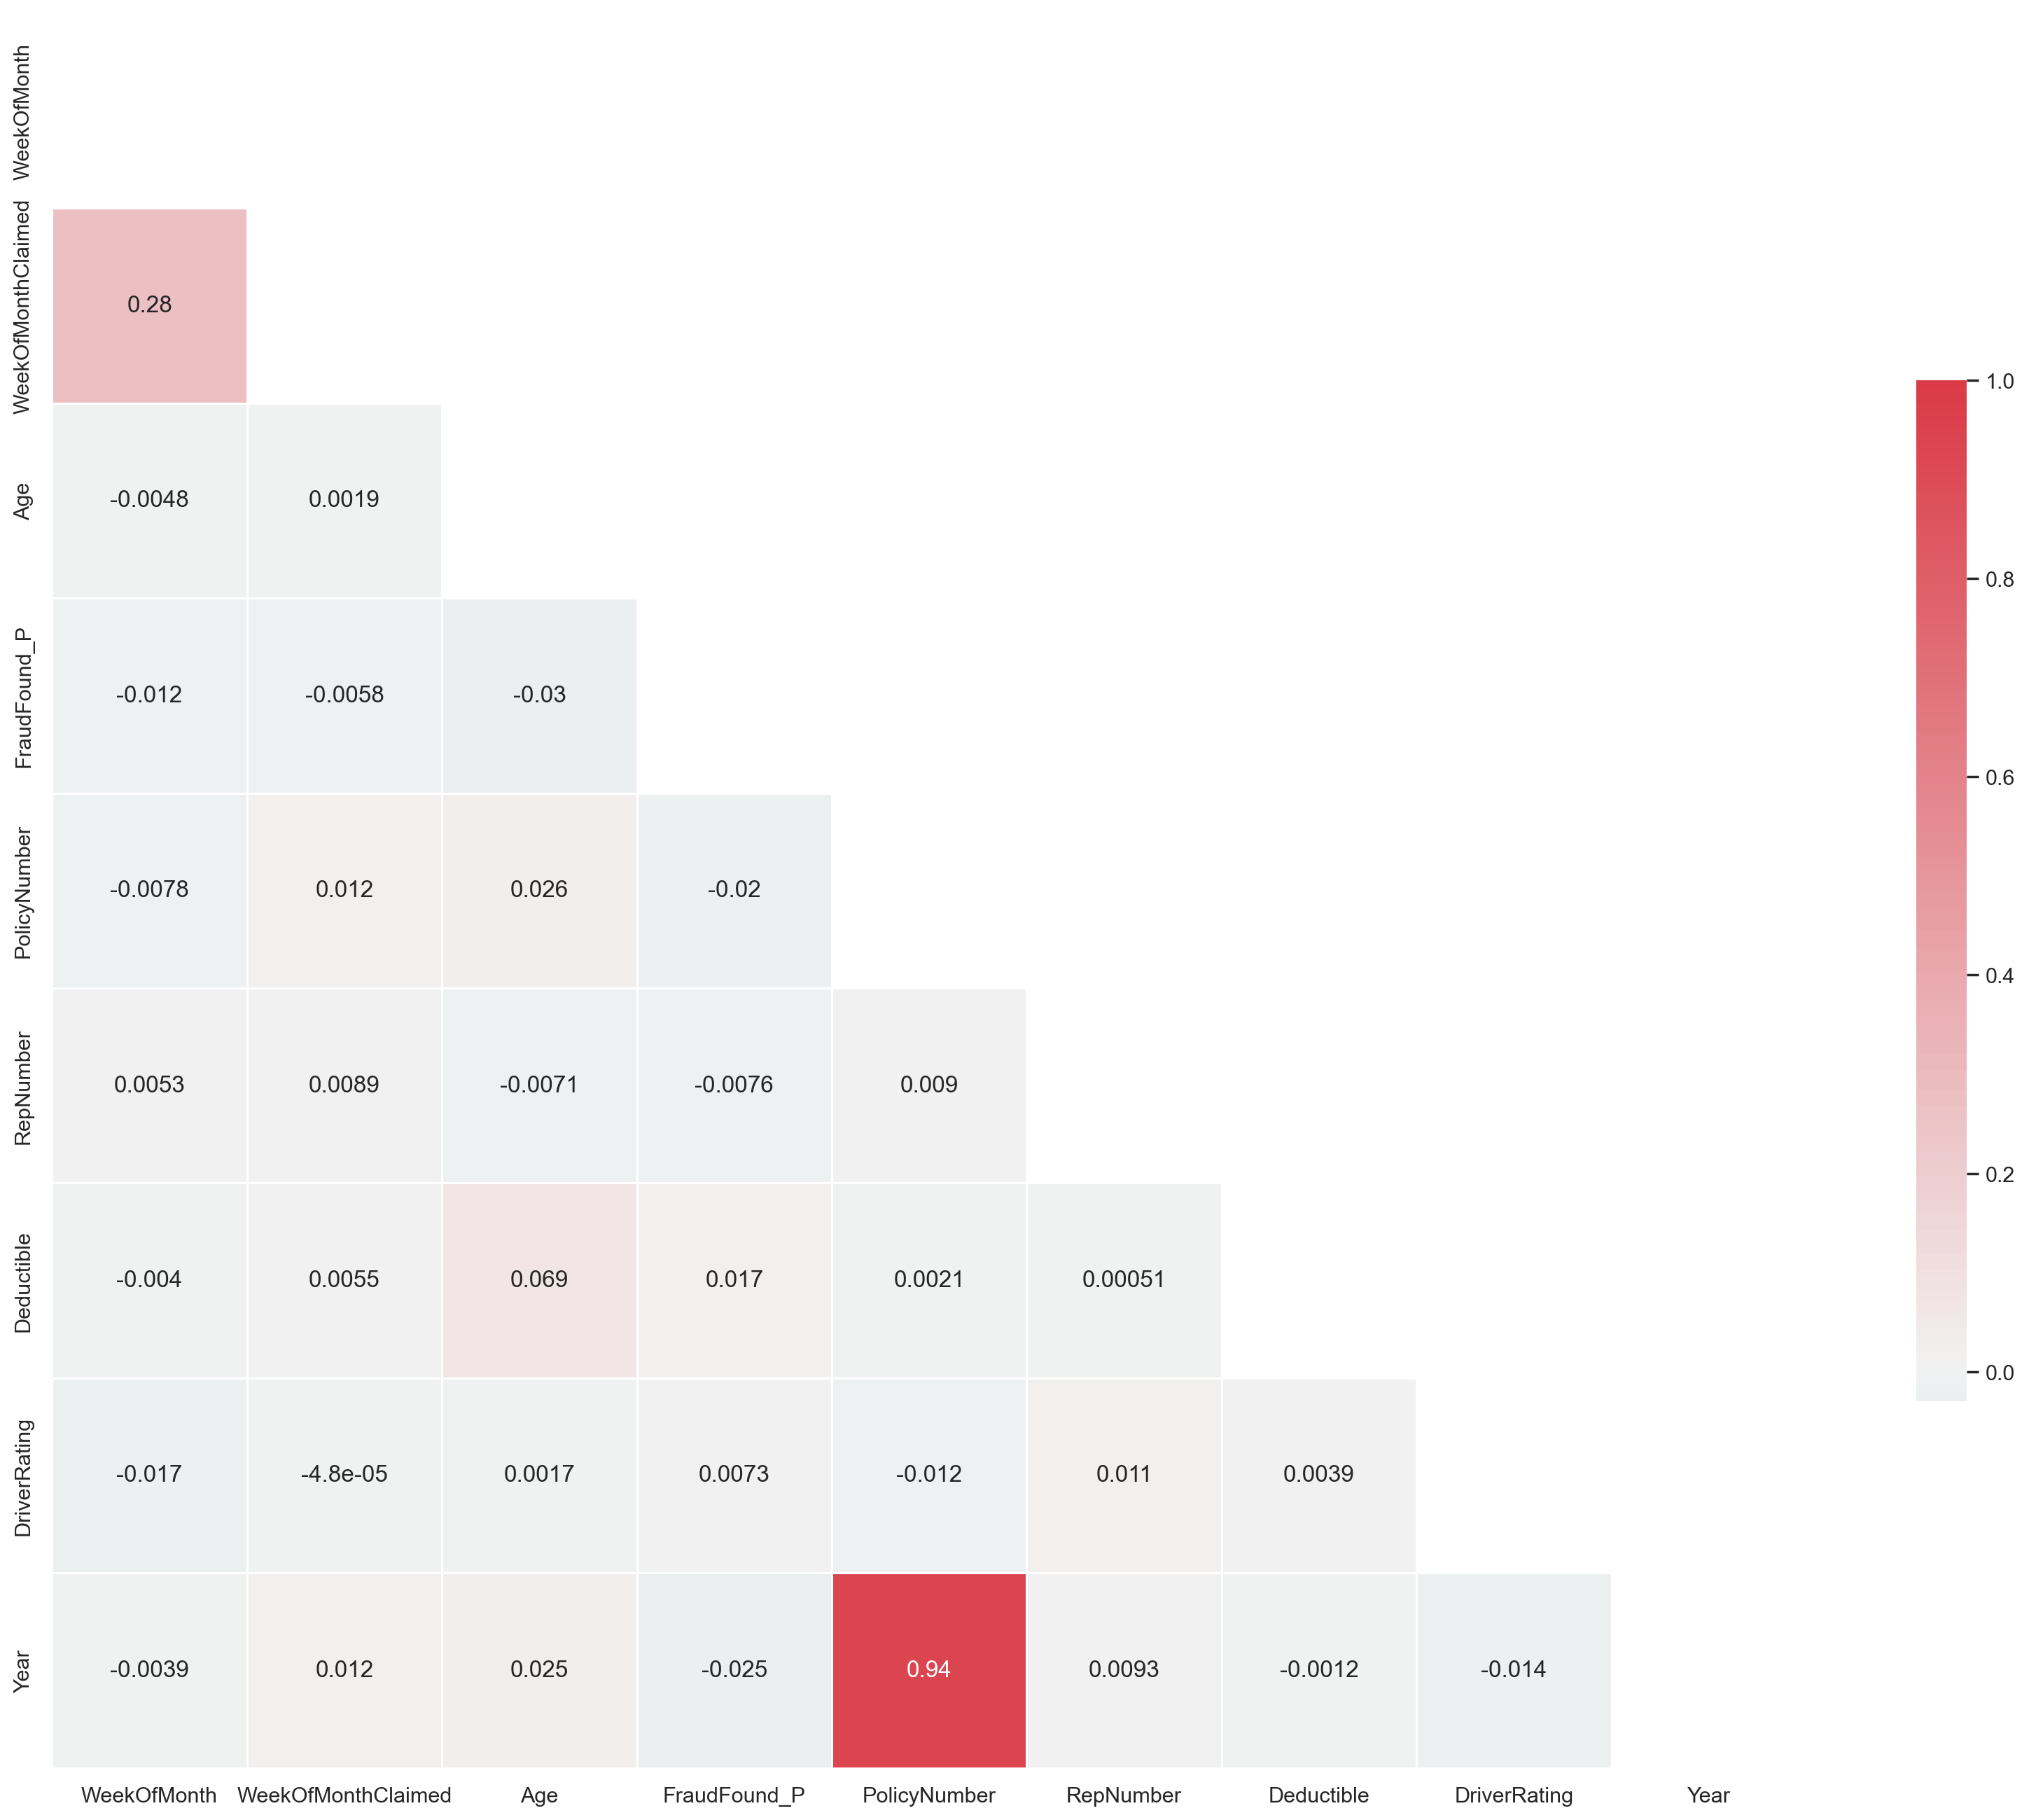

In [19]:
# Copied code from seaborn examples
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(fraud.corr(numeric_only = True), dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(fraud.corr(numeric_only = True), mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show();

### 3. Logistic Regression Model

#### 3.1 Use Logistic Regression

Use Logistic Regression and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

Accuracy is:  0.951048951048951


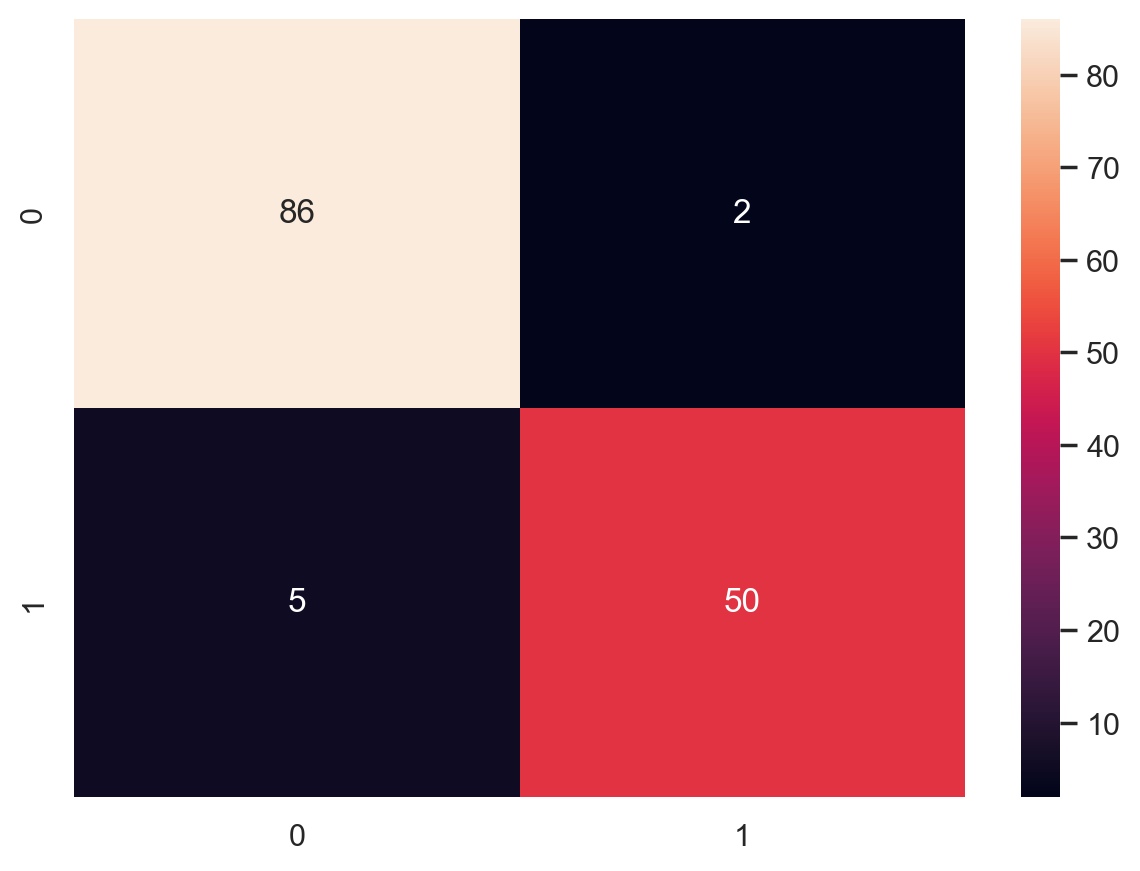

              precision    recall  f1-score   support

           B       0.95      0.98      0.96        88
           M       0.96      0.91      0.93        55

    accuracy                           0.95       143
   macro avg       0.95      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143



In [15]:
target_col = 'FraudFound_P'
feature_cols = [c for c in breast_cancer.columns if c != target_col]

X = breast_cancer[feature_cols]
y = breast_cancer[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

lin_model = LogisticRegression(solver='liblinear', max_iter = 10000)
lin_model.fit(X_train, y_train)
lin_model.score(X_test, y_test)

y_pred = lin_model.predict(X_test)
ac = accuracy_score(y_test, y_pred)
print('Accuracy is: ', ac)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.show()
print(classification_report(y_test, y_pred))

### 4. Support Vector Machine

#### 4.1 Use Support Vector Machine

Use Support Vector Machine and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

In [17]:
bm_map = {
    'B': 0,
    'M': 1
}

breast_cancer['diagnosis'] = breast_cancer['diagnosis'].map(bm_map)

Accuracy is:  0.9440559440559441


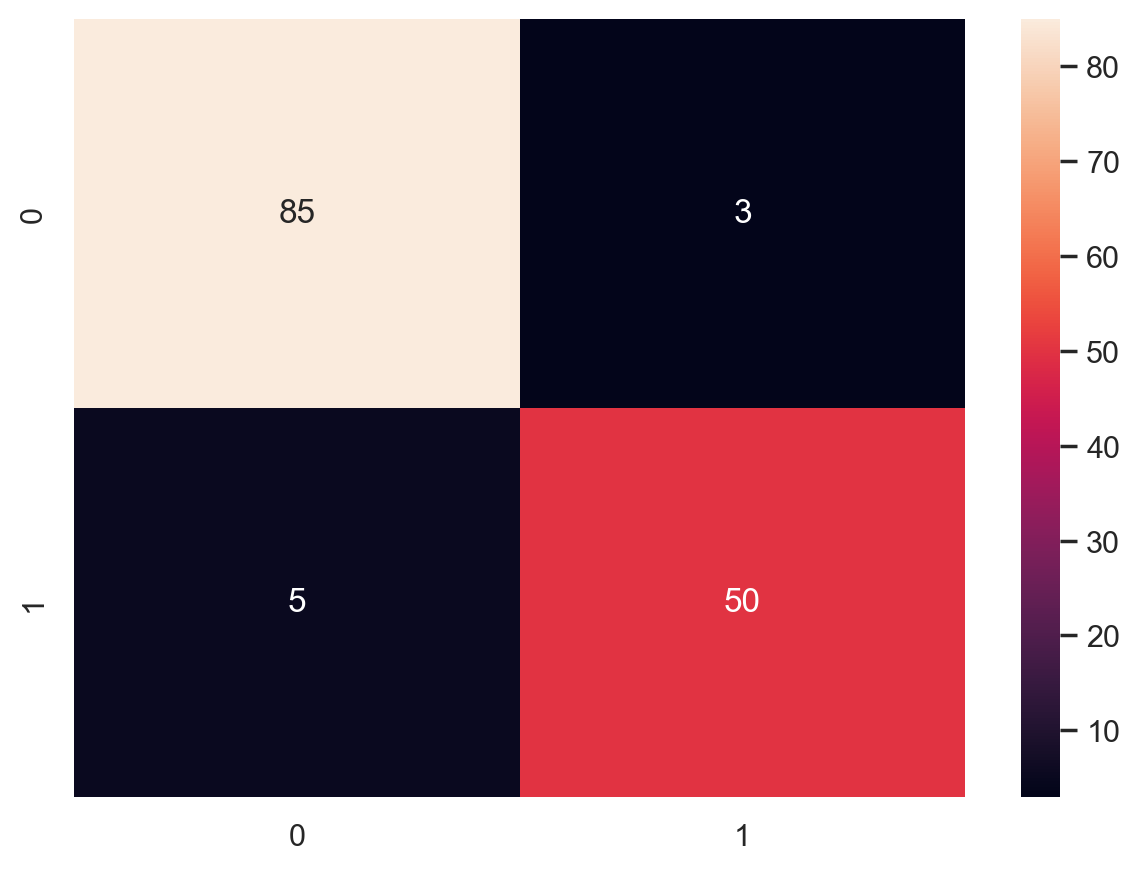

              precision    recall  f1-score   support

           0       0.94      0.97      0.96        88
           1       0.94      0.91      0.93        55

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



In [18]:
target_col = 'diagnosis'
feature_cols = [c for c in breast_cancer.columns if c != target_col]

X = breast_cancer[feature_cols]
y = breast_cancer[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

svc_model = SVC(kernel='linear', probability=True)
svc_model.fit(X_train, y_train)
svc_model.score(X_test, y_test)

y_pred = svc_model.predict(X_test)
ac = accuracy_score(y_test, y_pred)
print('Accuracy is: ', ac)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.show()
print(classification_report(y_test, y_pred))

### 5. Naive Bayes
#### 5.1 Use Naive Bayes

Use Naive Bayes and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

In [20]:
target_col = 'diagnosis'
feature_cols = [c for c in breast_cancer.columns if c != target_col]

X = breast_cancer[feature_cols]
y = breast_cancer[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(X_train, y_train)

# Predict Score
y_pred = model.predict(X_test)
ac = accuracy_score(y_test, y_pred)
print('Accuracy is: ', ac)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
print(classification_report(y_test, y_pred))

Accuracy is:  0.9440559440559441
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        88
           1       0.94      0.91      0.93        55

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



### 6 Gridsearch optimal parameters for Logistic Regression and SVM models

Is there any difference between accuracy score of Logistic Regression and SVM? Use grid search to find optimal parameter for both these models.

> Hyper-parameters are parameters that are not directly learnt within estimators. In scikit-learn they are passed as arguments to the constructor of the estimator classes. Typical examples include C, kernel and gamma for Support Vector Classifier, alpha for Lasso, etc.

> It is possible and recommended to search the hyper-parameter space for the best cross validation score.

> https://scikit-learn.org/stable/modules/grid_search.html#grid-search

**Note:** It'll take time to execute this. After running the cell, wait for result.

#### 6.1 Find Best Estimator For Logistic Regression

Find out how these parameters effect model. Find out the best estimator, score.

In [23]:
# gridsearch LR
from sklearn.model_selection import GridSearchCV

lr_params = {
    'penalty': ['l1','l2'],
    'C': [1, 10, 100]
}

lr_gs = GridSearchCV(lin_model, lr_params, cv=5, verbose = 1)

In [24]:
# Perform grid search on the training set
lr_gs.fit(X_train, y_train)

# After grid search is complete, evaluate the best model on the test set
test_score = lr_gs.score(X_test, y_test)
print("Test set score of the best model:", test_score)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Test set score of the best model: 0.958041958041958


In [25]:
best_lr = lr_gs.best_estimator_
print(lr_gs.best_params_)
print(lr_gs.best_score_)

{'C': 100, 'penalty': 'l1'}
0.9506976744186048


#### 6.2 Find Best Estimator For SVM

Find out how these parameters effect model. Find out the best estimator, score.

In [27]:
# gridsearch SVM

svc_params = {
    'C': [1, 10, 100],
    'gamma': [0.001, 0.0001],
    'kernel': ['linear','rbf']
}

svc_gs = GridSearchCV(SVC(probability=True), svc_params, cv=5, verbose=1)

In [28]:
# Perform grid search on the training set
svc_gs.fit(X_train, y_train)

# After grid search is complete, evaluate the best model on the test set
test_score = svc_gs.score(X_test, y_test)
print("Test set score of the best model:", test_score)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Test set score of the best model: 0.9440559440559441


In [29]:
best_svc = svc_gs.best_estimator_
print(svc_gs.best_params_)
print(svc_gs.best_score_)

{'C': 1, 'gamma': 0.001, 'kernel': 'linear'}
0.9507523939808482


#### 6.3 Plot the ROC curve for the SVM, Logistic Regressions and Naive Bayes on the same plot

Find out which model performs better.

In [31]:
yhat_pp_lin = lin_model.predict_proba(X_test)
yhat_pp_svc = svc_model.predict_proba(X_test)
yhat_pp_nb = model.predict_proba(X_test)

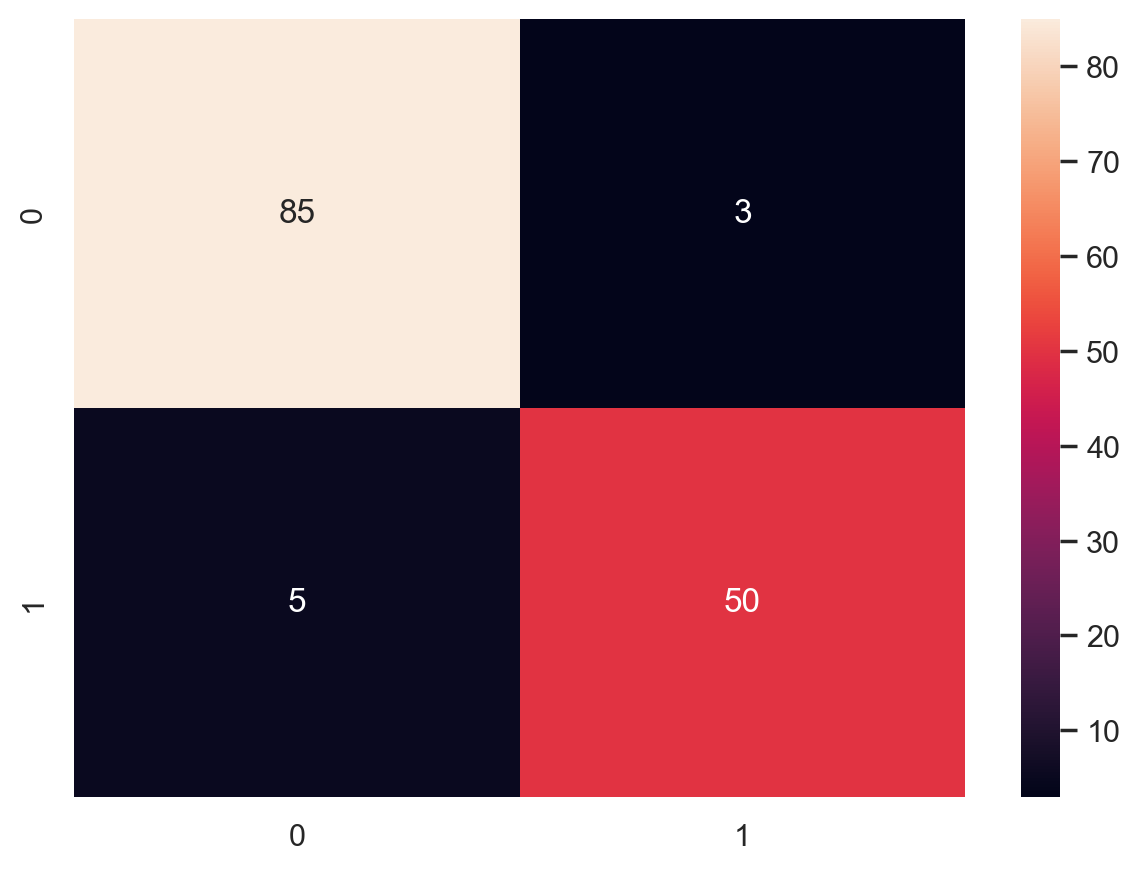

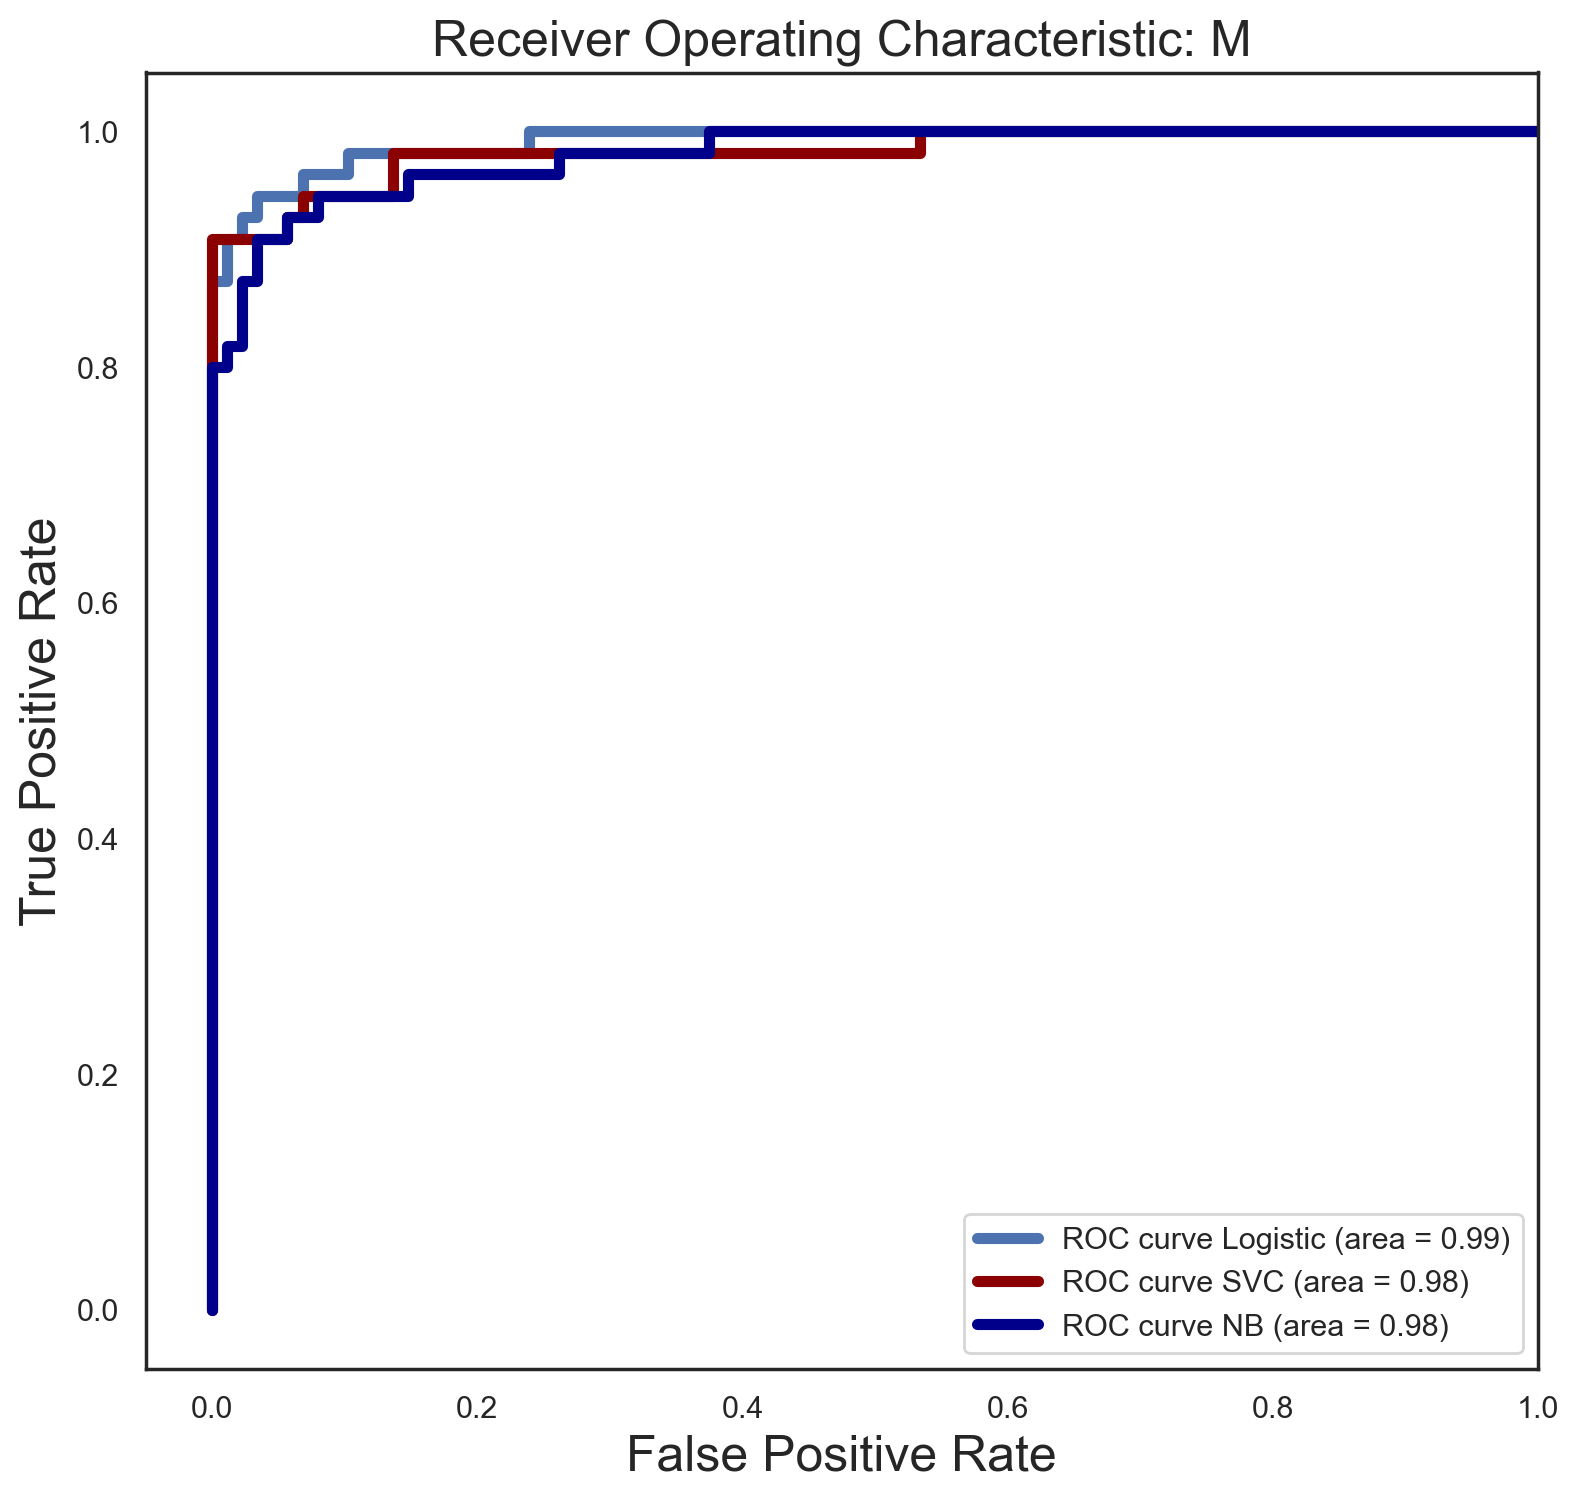

In [32]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_test contains the true labels
fpr_lin, tpr_lin, _ = roc_curve(y_test, yhat_pp_lin[:,1])
fpr_svc, tpr_svc, _ = roc_curve(y_test, yhat_pp_svc[:,1])
fpr_nb, tpr_nb, _ = roc_curve(y_test, yhat_pp_nb[:,1])

plt.figure(figsize=[8,8])

plt.plot(fpr_lin, tpr_lin, label='ROC curve Logistic (area = %0.2f)' % auc(fpr_lin, tpr_lin), linewidth=4)
plt.plot(fpr_svc, tpr_svc, label='ROC curve SVC (area = %0.2f)' % auc(fpr_svc, tpr_svc), linewidth=4, color='darkred')
plt.plot(fpr_nb, tpr_nb, label='ROC curve NB (area = %0.2f)' % auc(fpr_nb, tpr_nb), linewidth=4, color='darkblue')

plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver Operating Characteristic: M', fontsize=18)
plt.legend(loc="lower right")
plt.show()

### 7. [BONUS] Learning Curve

A learning curve compares the validation and training performance of an estimator for varying amounts of training data. If both the validation and training score converge to a value that is too low, we will not benefit much from more training data.

Plot "learning curves" for the best models of each. This is a great way see how training/testing size affects the scores. Look at the documentation for how to use this function in sklearn.

http://scikit-learn.org/stable/modules/learning_curve.html#learning-curves

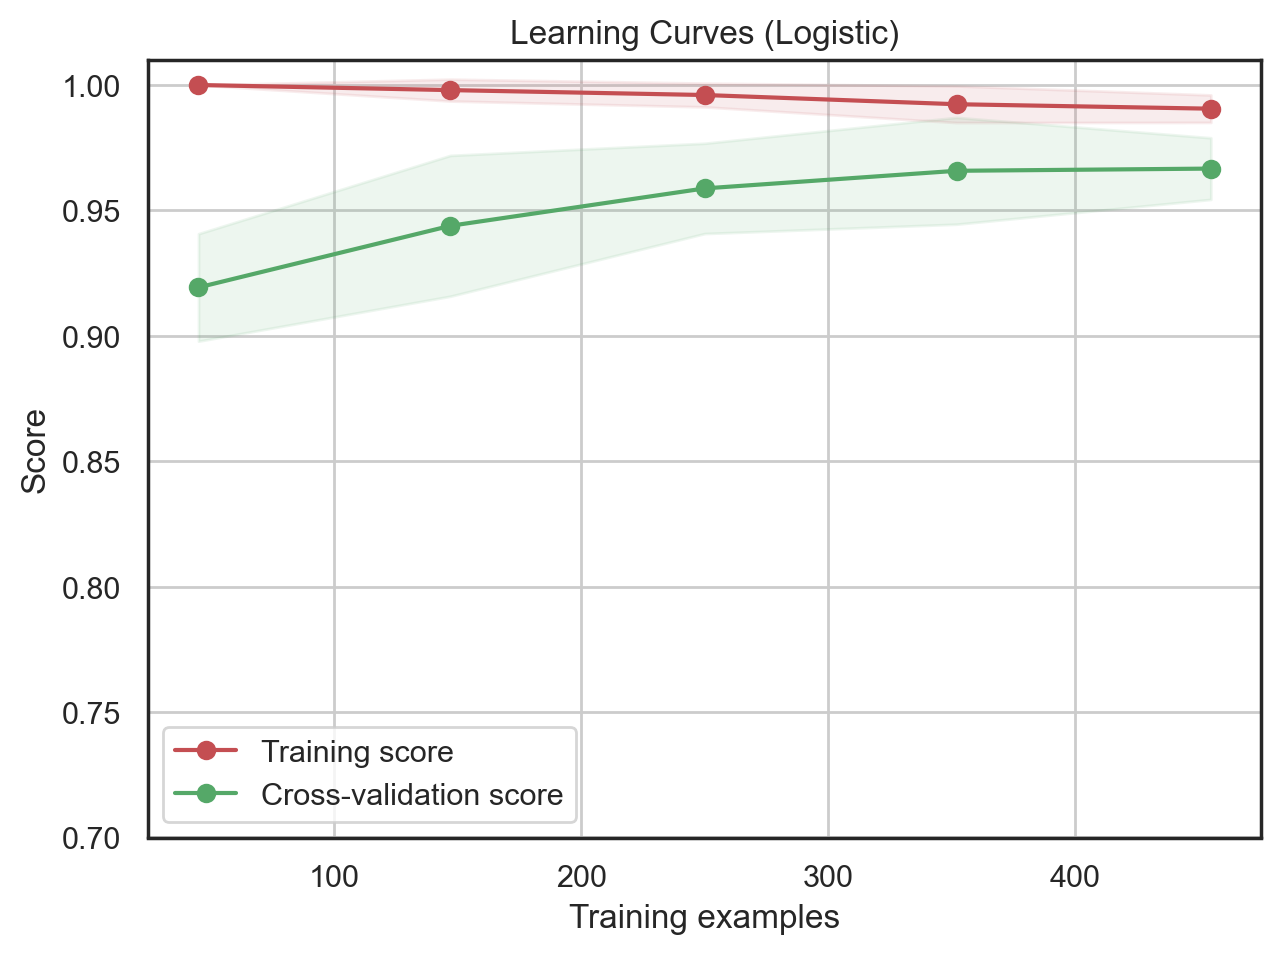

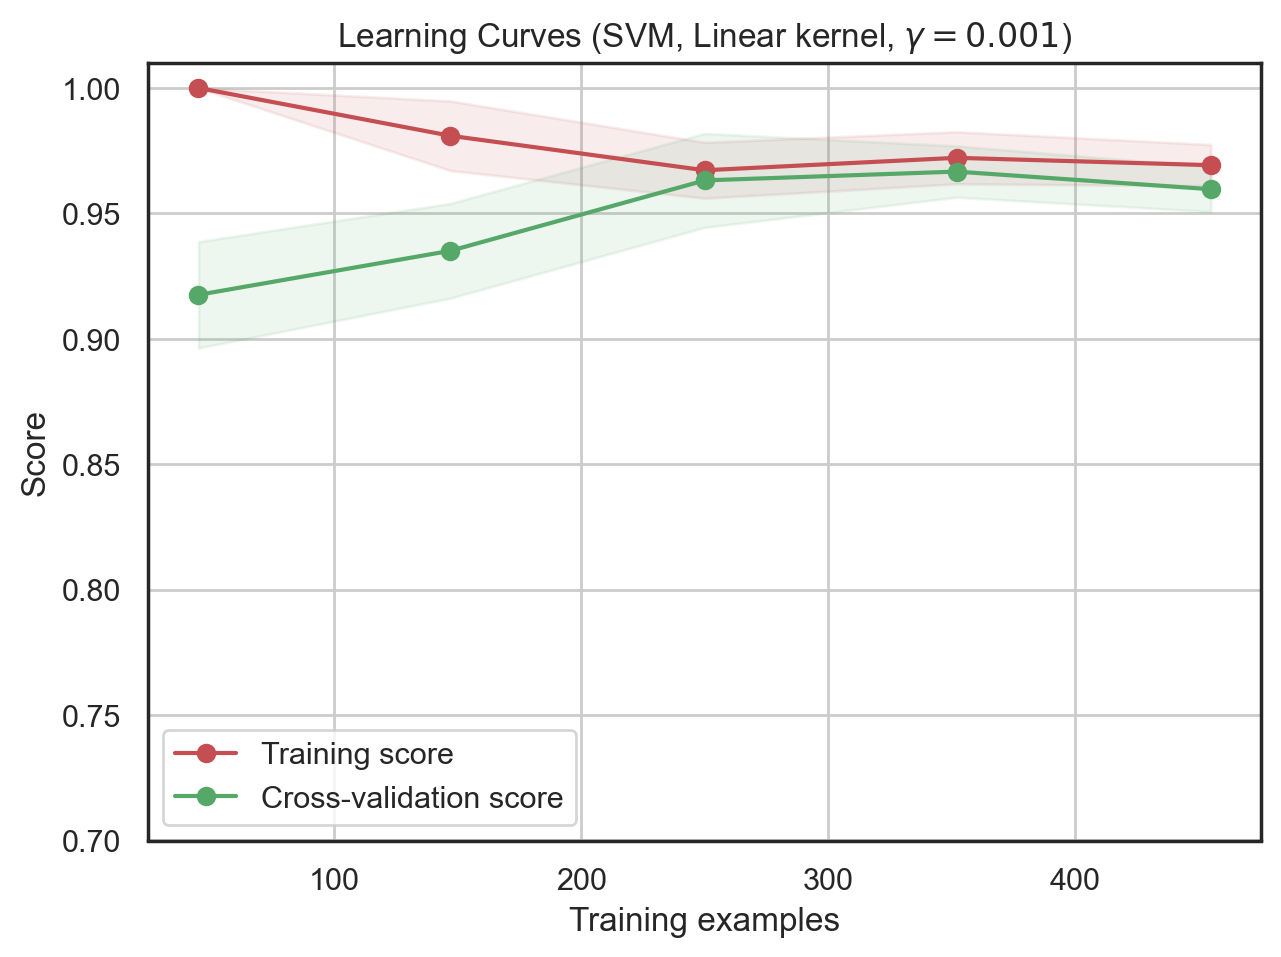

In [34]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

target_col = 'diagnosis'
feature_cols = [c for c in breast_cancer.columns if c != target_col]

X =  breast_cancer[feature_cols]
y = breast_cancer[target_col]

title = "Learning Curves (Logistic)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=1)

estimator = LogisticRegression(C = 70.17038286703837, penalty = 'l1', solver = 'liblinear')
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

title = r"Learning Curves (SVM, Linear kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=1)

estimator = SVC(C=27.825594022071257, gamma=1e-05, kernel = 'linear')
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show();

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Validation curves: plotting scores to evaluate models](https://scikit-learn.org/stable/modules/learning_curve.html#learning-curves)

[In-Depth: Support Vector Machines](https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html)

[Understanding Support Vector Machine algorithm from examples (along with code)](https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/)

[Tuning the hyper-parameters of an estimator](https://scikit-learn.org/stable/modules/grid_search.html#grid-search)

# Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [ ]:
def show_summary_report(actual, prediction):

    if isinstance(actual, pd.Series):
        actual = actual.values
    if actual.dtype.name == 'object':
        actual = actual.astype(int)
    if prediction.dtype.name == 'object':
        prediction = prediction.astype(float)

    prediction_int = np.round(prediction)

    accuracy_ = accuracy_score(actual, prediction_int)
    precision_ = precision_score(actual, prediction_int)
    recall_ = recall_score(actual, prediction_int)
    roc_auc_ = roc_auc_score(actual, prediction)

    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_)
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_)
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_)
    print('ROC AUC  : %.4f                                                                     Best: 1, Worst: < 0.5' % roc_auc_)
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction_int)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction)
    average_precision = average_precision_score(actual, prediction_int)

    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, prediction)
    roc_auc = auc(fpr, tpr)

    # plot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues', ax = ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')

    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    ax[1].fill_between(recall, precision, alpha = 0.2, color = 'b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc = 'lower right')

    plt.show()

    return (accuracy_, precision_, recall_, roc_auc_)

In [ ]:
# Keep the results in a dataframe
results = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'ROC_AUC'])

models = ['K-NN', 'Random Forest', 'Naïve Bayes', 'Logistic Regression', 'Stacking']
for i, m in enumerate([clf1, clf2, clf3, lr, sclf]):
    print('*' * (len(models[i]) + 4))
    print('* %s *' % models[i])
    print('*' * (len(models[i]) + 4))
    predictions = m.predict_proba(X_train)[:,1]
    # show the report
    accuracy_, precision_, recall_, roc_auc_ = show_summary_report(y_train, predictions)
    # keep the results
    results.loc[i] = {'Model': models[i],
                      'Accuracy': accuracy_,
                      'Precision': precision_,
                      'Recall': recall_,
                      'ROC_AUC': roc_auc_}
print(results)

# Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [ ]:
predictions = sclf.predict(X_test)
probabilities = sclf.predict_proba(X_test)[:,1]

In [ ]:
accuracy_, precision_, recall_, roc_auc_ = show_summary_report(y_test, probabilities)
# keep the results
results.loc[len(results)] = {
    'Model': 'Stacking (with test)',
    'Accuracy': accuracy_,
    'Precision': precision_,
    'Recall': recall_,
    'ROC_AUC': roc_auc_}
print(results)

# Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

The model can be used to answer (predict) if a person is diagnosed with a Benign or Malignant cancer.

In [ ]:
r = df.iloc[0]
for i, c in enumerate(df.columns[:-1]):
    print('%-27s: %d' % (c, int(r[i])))
print('%-27s: %s' % (df.columns[-1], 'Benign' if r[-1] == 2 else 'Malignant'))
print('%-27s: %s' % ('Prediction', 'Benign' if predictions[0] == 0 else 'Malignant'))



---



---



> > > > > > > > > © 2025 Institute of Data


---



---



